# Exploratory Data Analysis, Data Sciense Salaries Dataset
 

There are two reasons why I've decided to make this notebook: first is <span style="color:YellowGreen"> to hone my data analysis skills </span>. The second is <span style="color:Cyan"> to apply my data visualization knowledge </span> and <span style="color:LightCoral"> create some cool plots </span> depicting some of the insights I found while observing and processing data. Also, I am really interested in salary issues in the DS industry (cos I'm going to become one someday :) ).


So you could treat it like a study notebook made by entry-level specialist in data analysis and visualization.

## 1 Introduction


### 1.1 Imports


In [1]:
# data structures and interactions
import numpy as np
import pandas as pd
# visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# for getting more additional data
import requests
from bs4 import BeautifulSoup
# stats libs 
from scipy import stats
from scipy.stats import norm
# canvas style
mpl.style.use("ggplot")
# turn off some unimportant warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2 Data review

Load and take a closer look on data. 


In [2]:
df = pd.read_csv("ds_salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1640,2023,SE,FT,BI Developer,106000,USD,106000,US,0,US,M
405,2023,EN,FT,Research Engineer,155000,USD,155000,US,0,US,M
2542,2022,SE,FT,Data Engineer,160000,USD,160000,US,0,US,M
1416,2023,EN,FT,Data Engineer,135000,USD,135000,US,0,US,M
1174,2023,MI,FT,Data Engineer,90000,USD,90000,US,0,US,M


There are 11 columns in this dataset. Lets make a brief note about all of them.
<br>
1. _<span style="color:Teal">work_year</span>_  -  Contatins an year when the salary was distributed. This value is <span style="color:red">categorical</span>;

2. _<span style="color:Teal">experience_level</span>_  -  This is level required for the particular job. For example Senior or Entry Level. This value is <span style="color:red">categorical</span>;

3. _<span style="color:Teal">employment_type</span>_  -  Type of employment specified in employment contract. For example Full Time or Part Time.This value is <span style="color:red">categorical</span>; 

4. _<span style="color:Teal">job_title</span>_  -  Job name:). Different jobs are about different fields of data science and often demand different skills and provide different responsibilities. This value is <span style="color:red">categorical</span>;

5. _<span style="color:Teal">salary</span>_  -  Salary in _<span style="color:Teal">salary_currency</span>_ currencies. This value is <span style="color:Lime">numerical </span>;

6. _<span style="color:Teal">salary_currency</span>_  -  Currency of salary from _<span style="color:Teal">salary</span>_ field. This value is <span style="color:red">categorical</span>;

7. _<span style="color:Teal">salary_in_usd</span>_  -  Salary in USD. Very convenient column:). This value is <span style="color:Lime">numerical </span>;

8. _<span style="color:Teal">employee_residence</span>_  -  Country code of Employee residence. This value is <span style="color:red">categorical</span>;

9. _<span style="color:Teal">remote_ratio</span>_  -  Office work, Half remote or Full remote job. This value is <span style="color:red">categorical</span>;

10. _<span style="color:Teal">company_location</span>_  -  Country code of company location. This value is <span style="color:red">categorical</span>;

11. _<span style="color:Teal">company_size</span>_  -  Relative size of  company, like Large, Small or Medium. This value is <span style="color:red">categorical</span>.


<br>

### 1.3 Check for Missing and Duplicate data

In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

As we can see, luckly ,there are not missing data. 

Speaking of duplicates:



In [5]:
duplicate_data = df[df.duplicated()]
print("amount of duplicated data: ", duplicate_data.shape)
duplicate_data.sort_values(by=["salary","work_year","experience_level"]).head(5)

amount of duplicated data:  (1171, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3043,2022,MI,FT,Data Engineer,24000,USD,24000,US,0,US,M
2038,2022,SE,FT,Data Engineer,35000,EUR,36773,ES,0,ES,M
2238,2022,SE,FT,Data Engineer,35000,EUR,36773,ES,0,ES,M
2677,2022,SE,FT,Data Analyst,35000,EUR,36773,ES,0,ES,M
2783,2022,SE,FT,Data Analyst,35000,EUR,36773,ES,0,ES,M


Almost 1/3 of dataset is duplicated data but I consider this data meaningful because it is obvious that Roles with the same responsibilities in one region in one period of time will have similar salaries and etc. So we'll keep it . 


## 2 Data preperation


### 2.1 Proper names for values


How many unique values we have in each column?

In [6]:
for column in df.columns:
    n_uniq = len(df[column].unique())
    print(f"column {column} have {n_uniq} unique values")

column work_year have 4 unique values
column experience_level have 4 unique values
column employment_type have 4 unique values
column job_title have 93 unique values
column salary have 815 unique values
column salary_currency have 20 unique values
column salary_in_usd have 1035 unique values
column employee_residence have 78 unique values
column remote_ratio have 3 unique values
column company_location have 72 unique values
column company_size have 3 unique values


In [7]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Now let's make some of the abbreviations clearer and more understandable.

In [8]:
df["experience_level"] = df["experience_level"].replace(
    {
    "SE": "Senior",
    "EN": "Entry level",
    "EX": "Executive level",
    "MI": "Mid/Intermediate level",
    }
)
df["employment_type"] = df["employment_type"].replace(
    {
        "FL":"Freelance",
        "CT": "Contract",
        "PT": "Part-time",
        "FT": "Full-time",
    }
)
df["company_size"] = df["company_size"].replace(
    {
        "S":"Small",
        "M":"Medium",
        "L": "Large"
    }
    
)
df["remote_ratio"] = df["remote_ratio"].astype(str)
df["remote_ratio"].replace(
    {
        "0":"Office only", 
        "50":"Half-remote",
        "100":"Full-remote",
    }
    , inplace=True
)

### 2.2 Group the job title


In [9]:
print(df["job_title"].unique().size)
df["job_title"].unique()

93


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [10]:
data_analyst = ['Business Data Analyst','Staff Data Analyst','Product Data Analyst','Financial Data Analyst','Data Analytics Specialist',"Finance Data Analyst",'Lead Data Analyst','Data Quality Analyst',"Compliance Data Analyst", "Data Analyst","Principal Data Analyst", "Marketing Data Analyst", "Data Operations Analyst", "Data Analytics Consultant", "Data Analytics Engineer","Data Analytics Lead", "Product Data Analyst","Insight Analyst",   "Financial Data Analyst"]
data_scientist = [  'ETL Developer',  'Staff Data Scientist','Product Data Scientist','Data Scientist Lead','Data Science Tech Lead','Data Science Lead','Lead Data Scientist','Data Science Consultant','Data Science Manager','Applied Data Scientist', 'Research Scientist','Principal Data Scientist','Applied Scientist','Data Scientist',]
machine_learning =  ['MLOps Engineer','ML Engineer', 'Lead Machine Learning Engineer','Machine Learning Manager','Principal Machine Learning Engineer','Machine Learning Developer','Machine Learning Research Engineer','Machine Learning Infrastructure Engineer','Machine Learning Software Engineer','Applied Machine Learning Scientist', 'Machine Learning Scientist','Machine Learning Researcher','Machine Learning Engineer','Applied Machine Learning Engineer',]
data_architect = ['Data Architect',  'Big Data Architect', 'Principal Data Architect','Cloud Data Architect',]
data_engineer = [ 'Principal Data Engineer', 'Lead Data Engineer','NLP Engineer', 'Marketing Data Engineer','Computer Vision Software Engineer', 'Azure Data Engineer', 'Data Operations Engineer', 'Cloud Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Deep Learning Engineer',  'Big Data Engineer','Cloud Database Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer','Data Engineer', 'Computer Vision Engineer','Research Engineer', 'Analytics Engineer','Data Science Engineer',]
managment = [ 'Data Analytics Manager','Data Manager','Manager Data Management','Head of Machine Learning', 'Head of Data', 'Head of Data Science','Director of Data Science',]
ai_researcher = [ 'AI Developer','AI Scientist', 'AI Programmer',  ]
bi_analyst = ['Power BI Developer','BI Data Engineer','BI Developer','Business Intelligence Engineer',"BI Data Analyst", "BI Analyst",]
# other ones i cannot to put them into any group         
# simple def which we ll apply to create new column-job category
def job_category_assingment( job):
      if job in data_analyst:
            return "Data Analysis"
      if job in data_scientist:
            return "Data Science"
      if job in machine_learning:
            return "Machine Learning"
      if job in data_architect:
            return "Data Architecture"
      if job in data_engineer:
            return "Data Engineering"
      if job in managment:
            return "Managment"
      if job in  ai_researcher:
            return "Artificial Intelligence"
      if job in bi_analyst:
            return "Business Intelligence"
      return "Other"

df["job_category"] = df["job_title"].apply(job_category_assingment)
df.head(5) 
      
       

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-remote,ES,Large,Data Science
1,2023,Mid/Intermediate level,Contract,ML Engineer,30000,USD,30000,US,Full-remote,US,Small,Machine Learning
2,2023,Mid/Intermediate level,Contract,ML Engineer,25500,USD,25500,US,Full-remote,US,Small,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-remote,CA,Medium,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-remote,CA,Medium,Data Science


### 2.3 Dealing with inflation rates


To understand salary value more clearly, we need to know how much it would be in the present. For this particular purpose let's get inflation rates over years presented in our dataset. 

First thing we need, is Country list with Country Codes. It is a preperational step before hetting inflation data.

To get this data we will use https://restcountries.com/ API


In [11]:
countries_codes = np.unique(np.append(df["company_location"], df["employee_residence"]))
url = "https://restcountries.com/v3.1/alpha/"
countries_code_to_name = {} 
for code in countries_codes:
    response = requests.get(url+code)
    if response.status_code == requests.codes.ok:
        tmp = response.json()[0]
        countries_code_to_name[code]={"name":tmp["name"]["common"], "region":tmp["region"]}
    else:
        countries_code_to_name[code]=""
    
countries_code_to_name

{'AE': {'name': 'United Arab Emirates', 'region': 'Asia'},
 'AL': {'name': 'Albania', 'region': 'Europe'},
 'AM': {'name': 'Armenia', 'region': 'Asia'},
 'AR': {'name': 'Argentina', 'region': 'Americas'},
 'AS': {'name': 'American Samoa', 'region': 'Oceania'},
 'AT': {'name': 'Austria', 'region': 'Europe'},
 'AU': {'name': 'Australia', 'region': 'Oceania'},
 'BA': {'name': 'Bosnia and Herzegovina', 'region': 'Europe'},
 'BE': {'name': 'Belgium', 'region': 'Europe'},
 'BG': {'name': 'Bulgaria', 'region': 'Europe'},
 'BO': {'name': 'Bolivia', 'region': 'Americas'},
 'BR': {'name': 'Brazil', 'region': 'Americas'},
 'BS': {'name': 'Bahamas', 'region': 'Americas'},
 'CA': {'name': 'Canada', 'region': 'Americas'},
 'CF': {'name': 'Central African Republic', 'region': 'Africa'},
 'CH': {'name': 'Switzerland', 'region': 'Europe'},
 'CL': {'name': 'Chile', 'region': 'Americas'},
 'CN': {'name': 'China', 'region': 'Asia'},
 'CO': {'name': 'Colombia', 'region': 'Americas'},
 'CR': {'name': 'Costa

In [12]:
df["company_location_region"] = df["company_location"].apply(lambda x: countries_code_to_name[x]["region"] if x in countries_code_to_name.keys() else np.nan)
df["employee_residence_region"] = df["employee_residence"].apply(lambda x: countries_code_to_name[x]["region"] if x in countries_code_to_name.keys() else np.nan)
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,company_location_region,employee_residence_region
3384,2022,Senior,Full-time,Data Analyst,150075,USD,150075,US,Full-remote,US,Medium,Data Analysis,Americas,Americas
566,2023,Senior,Full-time,Data Scientist,183500,USD,183500,US,Full-remote,US,Medium,Data Science,Americas,Americas
3020,2022,Senior,Full-time,Data Engineer,139860,USD,139860,US,Office only,US,Medium,Data Engineering,Americas,Americas
3495,2021,Senior,Full-time,Machine Learning Scientist,120000,USD,120000,US,Half-remote,US,Small,Machine Learning,Americas,Americas
2137,2022,Mid/Intermediate level,Full-time,Data Engineer,160000,USD,160000,US,Full-remote,US,Medium,Data Engineering,Americas,Americas


In [13]:
df.rename(columns={"company_location":"company_location_country_code", "employee_residence":"employee_residence_country_code"}, inplace=True)
df["company_location_country_name"] = df["company_location_country_code"].apply(lambda x: countries_code_to_name[x]["name"])
df["employee_residence_country_name"] = df["employee_residence_country_code"].apply(lambda x: countries_code_to_name[x]["name"])
df.head(5)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence_country_code,remote_ratio,company_location_country_code,company_size,job_category,company_location_region,employee_residence_region,company_location_country_name,employee_residence_country_name
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-remote,ES,Large,Data Science,Europe,Europe,Spain,Spain
1,2023,Mid/Intermediate level,Contract,ML Engineer,30000,USD,30000,US,Full-remote,US,Small,Machine Learning,Americas,Americas,United States,United States
2,2023,Mid/Intermediate level,Contract,ML Engineer,25500,USD,25500,US,Full-remote,US,Small,Machine Learning,Americas,Americas,United States,United States
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-remote,CA,Medium,Data Science,Americas,Americas,Canada,Canada
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-remote,CA,Medium,Data Science,Americas,Americas,Canada,Canada


In [14]:
df.isnull().sum()

work_year                          0
experience_level                   0
employment_type                    0
job_title                          0
salary                             0
salary_currency                    0
salary_in_usd                      0
employee_residence_country_code    0
remote_ratio                       0
company_location_country_code      0
company_size                       0
job_category                       0
company_location_region            0
employee_residence_region          0
company_location_country_name      0
employee_residence_country_name    0
dtype: int64

There is data from 2020-2023 period of time, so we need inflation rates over this years.

We will use inflation rates from https://databank.worldbank.org. Let's find out what time period we need to cover and download this data.

Unfortinately databases contain data only until the end of 2022 and there is no inflation data for 2022, so we will use region data from other sources, in this particular notebook, i'll use data from https://www.worlddata.info/inflation.php.


In [15]:
df_inflation = pd.read_csv("347a8786-1897-4f8f-95bf-69d1737323d7_Data.csv")
df_inflation = df_inflation[df_inflation["Country Name"].isin([el["name"] for key, el in countries_code_to_name.items()])]
df_inflation.drop(["Series Code",	"Version Name",	"Version Code","2019 [YR2019]"], axis=1, inplace= True)
df_inflation.rename(columns={"2020 [YR2020]":"2020", "2021 [YR2021]":"2021", "2022 [YR2022]":"2022"}, inplace=True)
df_inflation.head(5)


,Country Name,Country Code,Series Name,2020,2021,2022
3,Albania,ALB,"Inflation, consumer prices (annual %)",1.62088661717004,2.04147163139546,..
4,Algeria,DZA,"Inflation, consumer prices (annual %)",2.41513094083414,7.22606307415476,..
5,American Samoa,ASM,"Inflation, consumer prices (annual %)",..,..,..
11,Argentina,ARG,"Inflation, consumer prices (annual %)",..,..,..
12,Armenia,ARM,"Inflation, consumer prices (annual %)",1.21143577838465,7.18483629443373,..


In [16]:
print(df_inflation.info())
df_inflation.shape

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 3 to 290
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  76 non-null     object
 1   Country Code  76 non-null     object
 2   Series Name   76 non-null     object
 3   2020          76 non-null     object
 4   2021          76 non-null     object
 5   2022          76 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB
None


(76, 6)

For all countries which inflation data is missing completly, world inflation rates will be used instead.


#### 2.3.1 Dealing with missing values in inflation dataset


First of all, we change all missing values to <span style="color:Cyan">np.nan</span> and change column type to <span style="color:MediumAquamarine">float</span>. 


In [17]:
df_inflation.replace("..", np.nan, inplace=True)
df_inflation.head(5)

,Country Name,Country Code,Series Name,2020,2021,2022
3,Albania,ALB,"Inflation, consumer prices (annual %)",1.62088661717004,2.04147163139546,NaN
4,Algeria,DZA,"Inflation, consumer prices (annual %)",2.41513094083414,7.22606307415476,NaN
5,American Samoa,ASM,"Inflation, consumer prices (annual %)",NaN,NaN,NaN
11,Argentina,ARG,"Inflation, consumer prices (annual %)",NaN,NaN,NaN
12,Armenia,ARM,"Inflation, consumer prices (annual %)",1.21143577838465,7.18483629443373,NaN


Now lets drop rows where 2020 data missed, because of inflation dataset struct. If there is no data for 2020, there is no data for upcoming years as well.

To prove it, lets print all row where 2020 data is missing


In [18]:
missing_inflation_data = df_inflation.isnull()
df_inflation[missing_inflation_data["2020"]]

,Country Name,Country Code,Series Name,2020,2021,2022
5,American Samoa,ASM,"Inflation, consumer prices (annual %)",NaN,NaN,NaN
11,Argentina,ARG,"Inflation, consumer prices (annual %)",NaN,NaN,NaN
220,Puerto Rico,PRI,"Inflation, consumer prices (annual %)",NaN,NaN,NaN
223,Romania,ROM,"Inflation, consumer prices (annual %)",NaN,NaN,NaN


In [19]:
df_inflation.dropna(subset=["2020"], inplace=True)
df_inflation.shape

(72, 6)

In [20]:
df_inflation[["2020","2021","2022"]] = df_inflation[["2020","2021","2022"]].astype(float).round(2)
df_inflation.head(5)

,Country Name,Country Code,Series Name,2020,2021,2022
3,Albania,ALB,"Inflation, consumer prices (annual %)",1.62,2.04,NaN
4,Algeria,DZA,"Inflation, consumer prices (annual %)",2.42,7.23,NaN
12,Armenia,ARM,"Inflation, consumer prices (annual %)",1.21,7.18,NaN
14,Australia,AUS,"Inflation, consumer prices (annual %)",0.85,2.86,NaN
15,Austria,AUT,"Inflation, consumer prices (annual %)",1.38,2.77,NaN


In [21]:
missing_inflation_data = df_inflation.isnull()
for col in missing_inflation_data.columns.values.tolist():
    print(missing_inflation_data[col].value_counts())

Country Name
False    72
Name: count, dtype: int64
Country Code
False    72
Name: count, dtype: int64
Series Name
False    72
Name: count, dtype: int64
2020
False    72
Name: count, dtype: int64
2021
False    71
True      1
Name: count, dtype: int64
2022
True    72
Name: count, dtype: int64


There is only one empty field in 2021 field left.

But i still going to fill it with world inflation data. 

Also world inflation data will be used for whose countries which is not in inflation data.

In [22]:
world_inflation = {"2020":1.92, "2021":3.5,"2022":6.4}

In [23]:
for year in ["2020", "2021"]:
    df_inflation[year].replace(to_replace = np.nan,value=world_inflation[year], inplace = True)
df_inflation.isnull().sum()

Country Name     0
Country Code     0
Series Name      0
2020             0
2021             0
2022            72
dtype: int64

Now lets pull data from https://www.worlddata.info/inflation.php to fill in 2022 year

In [24]:
url = "https://www.worlddata.info/inflation.php"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content)
table = soup.find("table")
df_2022_inflation = pd.read_html(str(table))[0]
df_2022_inflation.head()

,Country,2021,2022
0,Macao *,0.0 %,1.0 %
1,Bolivia,0.7 %,1.7 %
2,Hong Kong *,1.6 %,1.9 %
3,China,1.0 %,2.0 %
4,Saudi Arabia,3.1 %,2.5 %


In [25]:
df_2022_inflation.rename(columns={"Country":"Country Name"}, inplace=True)
df_2022_inflation.drop(columns=["2021"], inplace=True)
df_2022_inflation["2022"] = df_2022_inflation["2022"].apply(lambda x: float(x[:-2]))
# merge 2022 data into main inflation dataframe
df_inflation = pd.merge(df_inflation, df_2022_inflation, on="Country Name", how="inner")
df_inflation[:5]

,Country Name,Country Code,Series Name,2020,2021,2022_x,2022_y
0,Algeria,DZA,"Inflation, consumer prices (annual %)",2.42,7.23,NaN,9.3
1,Armenia,ARM,"Inflation, consumer prices (annual %)",1.21,7.18,NaN,8.6
2,Australia,AUS,"Inflation, consumer prices (annual %)",0.85,2.86,NaN,6.6
3,Austria,AUT,"Inflation, consumer prices (annual %)",1.38,2.77,NaN,8.5
4,Belgium,BEL,"Inflation, consumer prices (annual %)",0.74,2.44,NaN,9.6


In [26]:
df_inflation.drop(columns=["2022_x"], inplace=True)
df_inflation.rename(columns={"2022_y":"2022"}, inplace=True)
df_inflation.head()


,Country Name,Country Code,Series Name,2020,2021,2022
0,Algeria,DZA,"Inflation, consumer prices (annual %)",2.42,7.23,9.3
1,Armenia,ARM,"Inflation, consumer prices (annual %)",1.21,7.18,8.6
2,Australia,AUS,"Inflation, consumer prices (annual %)",0.85,2.86,6.6
3,Austria,AUT,"Inflation, consumer prices (annual %)",1.38,2.77,8.5
4,Belgium,BEL,"Inflation, consumer prices (annual %)",0.74,2.44,9.6


To recalculate present value of past salaries we use next formula

$$ AdjustedValue = Value*(1+InflationRate) $$

So for example if we have 100$ in 2020 and inflation rates - 2020 - 1.9, 2021 - 2.8, 2022 - 3.96 in 2023 we will have


1. $$ 100*(1+0.019)=101.9 \quad in \; 2021 $$

2. $$ 101.9*(1+0.028) \approx 104.8 \quad in \: 2022 $$

3. $$ 104.8*(1+0.04) \approx 109 \quad in \; 2023 $$


In [27]:
def adjusted_value(row):
    year = row["work_year"]
    orig_salary = row["salary_in_usd"]
    c_loc_code = row["company_location_country_code"]
    if year == 2023:
        return orig_salary
    
    adj_sal = orig_salary
    for y in range(year, 2023):
        if c_loc_code in df_inflation["Country Code"].unique().tolist():
            tmp = df_inflation[df_inflation["Country Code"==c_loc_code]]
            adj_sal *= 1+tmp.loc[tmp.index[0],str(y)]/100
        else:
            adj_sal *= 1+ world_inflation[str(y)]/100
    return np.round(adj_sal)

df["adjusted_salary_usd"] = df.apply(adjusted_value, axis=1)

In [28]:
df.sort_values(by=["work_year"]).sample(5)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence_country_code,remote_ratio,company_location_country_code,company_size,job_category,company_location_region,employee_residence_region,company_location_country_name,employee_residence_country_name,adjusted_salary_usd
1637,2023,Senior,Full-time,Data Engineer,232200,USD,232200,US,Full-remote,US,Medium,Data Engineering,Americas,Americas,United States,United States,232200.0
2451,2022,Entry level,Full-time,Data Engineer,40000,GBP,49253,GB,Full-remote,GB,Medium,Data Engineering,Europe,Europe,United Kingdom,United Kingdom,52405.0
2423,2022,Senior,Full-time,Data Analyst,127000,USD,127000,US,Full-remote,US,Medium,Data Analysis,Americas,Americas,United States,United States,135128.0
1130,2023,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,US,Full-remote,US,Medium,Machine Learning,Americas,Americas,United States,United States,150000.0
1718,2023,Senior,Full-time,Data Engineer,175308,USD,175308,US,Office only,US,Medium,Data Engineering,Americas,Americas,United States,United States,175308.0


In [29]:
df["company_location_region"].unique()

array(['Europe', 'Americas', 'Africa', 'Asia', 'Oceania'], dtype=object)

### 2.4 Average Salaries in the Country And Region Additional Information

For furthermore comparison and to check if presented data is not an outlier we'll get overall region and country mean salaries.

Fortunately, Mean Income per Country in 2023 can be acquired from https://www.worlddata.info/average-income.php which is data aggregation from wrold bank data.

In [30]:
url = "https://www.worlddata.info/average-income.php"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content)
table = soup.find("table")
df_2023_avg_income = pd.read_html(str(table))[0]
df_2023_avg_income.sample(10)

,Rank,Country,Avg. income per year,Avg. income per month
32,33,Greece,"20,000 $","1,667 $"
47,48,Indonesia,"4,180 $",348 $
49,50,Sri Lanka,"4,030 $",336 $
20,21,Macao *,"46,450 $","3,871 $"
48,49,Ukraine,"4,120 $",343 $
62,63,Myanmar,"1,170 $",98 $
7,8,Denmark,"68,300 $","5,692 $"
45,46,Colombia,"6,190 $",516 $
4,5,Norway,"83,880 $","6,990 $"
36,37,China,"11,880 $",990 $


In [31]:
df_2023_avg_income.rename(columns={"Country":"country_name", "Avg. income per\xa0month":"month_income_usd", "Avg. income per\xa0year":"year_income_usd"}, inplace=True)
df_2023_avg_income["year_income_usd"] = df_2023_avg_income["year_income_usd"].apply(lambda x: np.round(float((x[:-2]).replace(",","")), 2))
df_2023_avg_income["month_income_usd"] = df_2023_avg_income["month_income_usd"].apply(lambda x: np.round(float((x[:-2]).replace(",", "")), 2))
df_2023_avg_income.sample(5)


,Rank,country_name,year_income_usd,month_income_usd
1,2,Bermuda *,122470.0,10206.0
0,1,Monaco,186080.0,15507.0
59,60,Cambodia,1580.0,132.0
12,13,Netherlands,55200.0,4600.0
14,15,Finland,53510.0,4459.0


## 3 Deeper look into data distribution



Here will be a lot of plots which contian all form of analysis.



### 3.1 Adjusted Salary Distribution and Q-Q plot 


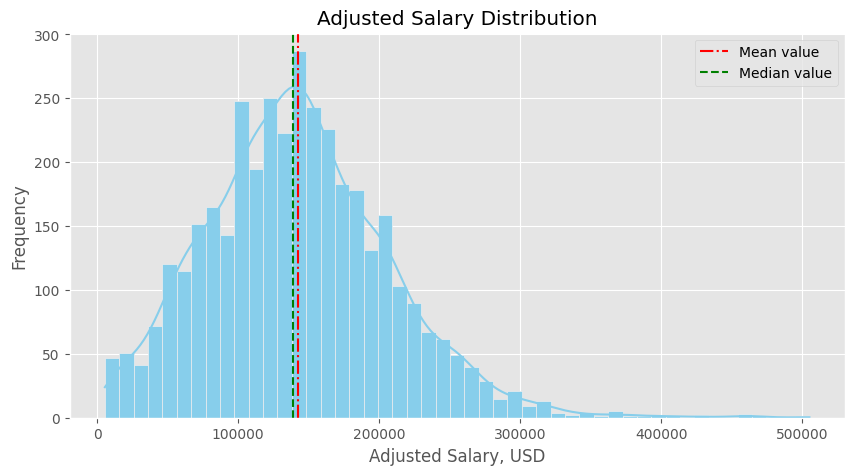

In [32]:
plt.figure(figsize=(10,5))

sns.histplot(data = df["adjusted_salary_usd"], kde=True, color="skyblue", alpha=1)
plt.ylabel("Frequency")
plt.xlabel("Adjusted Salary, USD")
plt.title("Adjusted Salary Distribution")
m_data = df["adjusted_salary_usd"].agg(["mean", "median"])
plt.axvline(x=m_data["mean"], label = "Mean value", color="red", linestyle="-.")
plt.axvline(x=m_data["median"], label = "Median value", color="green", linestyle="--")
plt.legend(loc="best")


As we can see this distribution is very familiar to normal distribution. Lets plot Q-Q plot to look more closely.

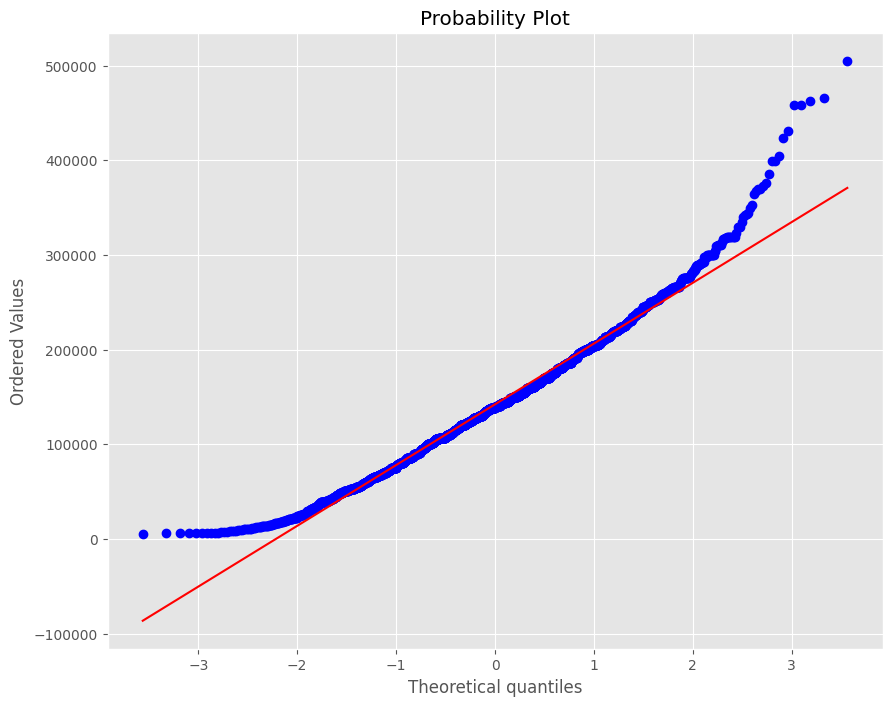

Skewness: 0.5657421880789071
Kurtosis (Unbiased, normal==0): 1.07618586186122
Standart Deviation Sigma: 64185.70073009009
Median, Mu: 142164.09773635154
Coefficient of Determination, r: 0.990691827771442


In [33]:
plt.figure(figsize=(10, 8))
_, (slope, intercept, r) = stats.probplot(df["adjusted_salary_usd"], dist="norm", plot =plt)
plt.show()
print(f"Skewness: {df['adjusted_salary_usd'].skew()}")
print(f"Kurtosis (Unbiased, normal==0): {df['adjusted_salary_usd'].kurt()}")
print(f"Standart Deviation Sigma: {slope}")
print(f"Median, Mu: {intercept}")
print(f"Coefficient of Determination, r: {r}")

Points almost fit the reference line, but both edges are located above it, so we can say that our distribution is normal but has a shift to the right 

Speaking of statistics, we have Leptokurtic Distribution. It means that it is more likely to follow a Laplace Distribution than Normal, and has significant outliers in it. Skewness says that our data shifted to the right. The coefficient of determination is very close to 1 so we can conclude that model fits data pretty well. 

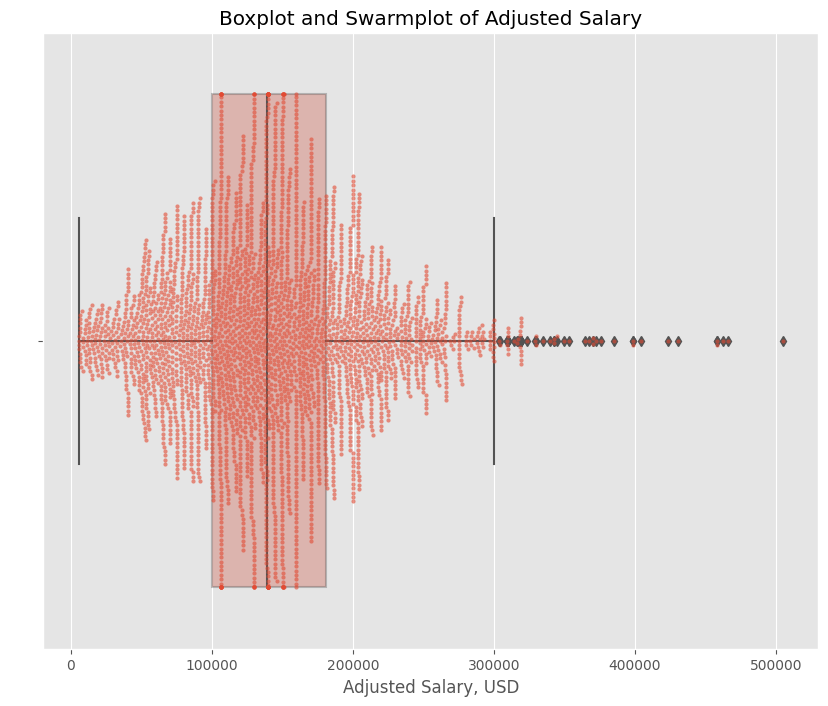

In [34]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = df["adjusted_salary_usd"], boxprops=dict(alpha=0.35))
sns.swarmplot(x = df["adjusted_salary_usd"], alpha = 0.6, size=3)
plt.title("Boxplot and Swarmplot of Adjusted Salary")
plt.xlabel("Adjusted Salary, USD")
plt.ylabel(" ")
plt.show()

In [35]:
df["adjusted_salary_usd"].describe().apply(lambda x: np.round(x,2))

count      3755.00
mean     142164.10
std       64741.55
min        5460.00
25%      100000.00
50%      139000.00
75%      180880.00
max      505073.00
Name: adjusted_salary_usd, dtype: float64

### 3.2 Job Category Distribution

In [36]:
job_cat_per = df["job_category"].value_counts(normalize=True)*100
df.groupby(by="job_category")["adjusted_salary_usd"].count()

job_category
Artificial Intelligence      29
Business Intelligence        43
Data Analysis               672
Data Architecture           105
Data Engineering           1271
Data Science               1112
Machine Learning            412
Managment                    83
Other                        28
Name: adjusted_salary_usd, dtype: int64

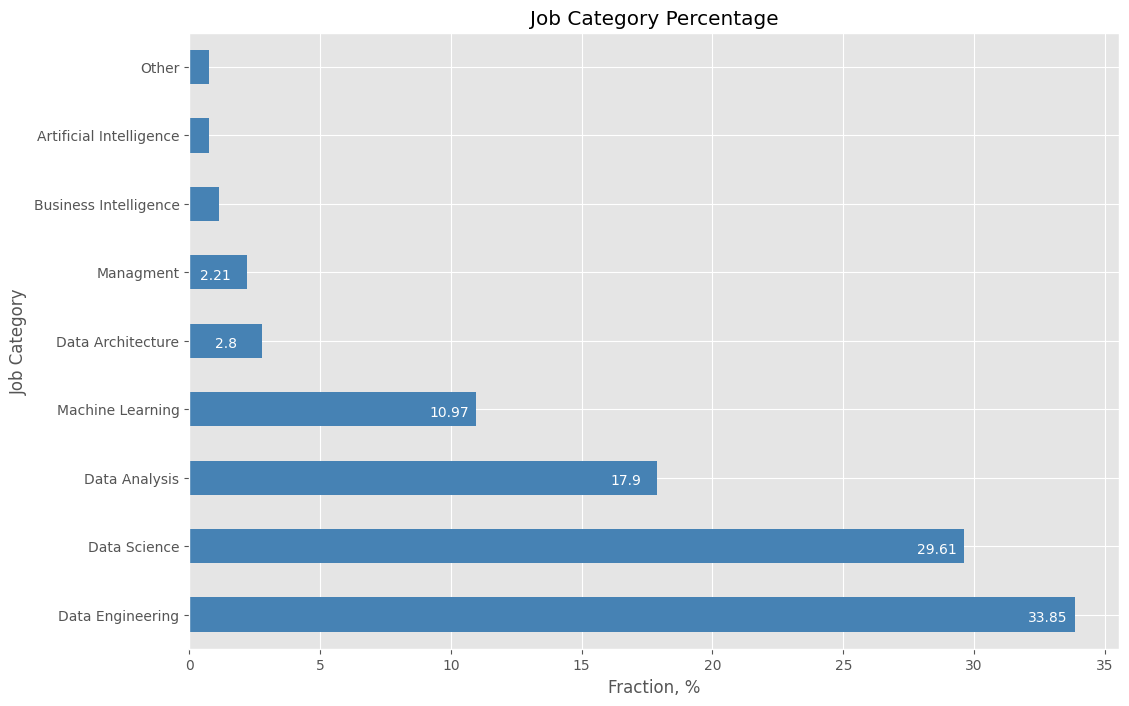

In [37]:
job_cat_per.plot(kind="barh", figsize=(12, 8), color="steelblue")
plt.title("Job Category Percentage")
plt.xlabel("Fraction, %")
plt.ylabel("Job Category")
for index, value in enumerate(job_cat_per):
    label = str(np.round(value, 2))
    plt.annotate(label, xy=(value-1.8, index-0.1), color="white")
plt.show()

In other words, over <span style="color:deeppink">80% </span>of Jobs presented in dataset is data analysis, engineering and science. 

<p> The next plot is just a different type of plot above but serves the goal to show that a huge part of the jobs presented is belongs to one particular group.</p>

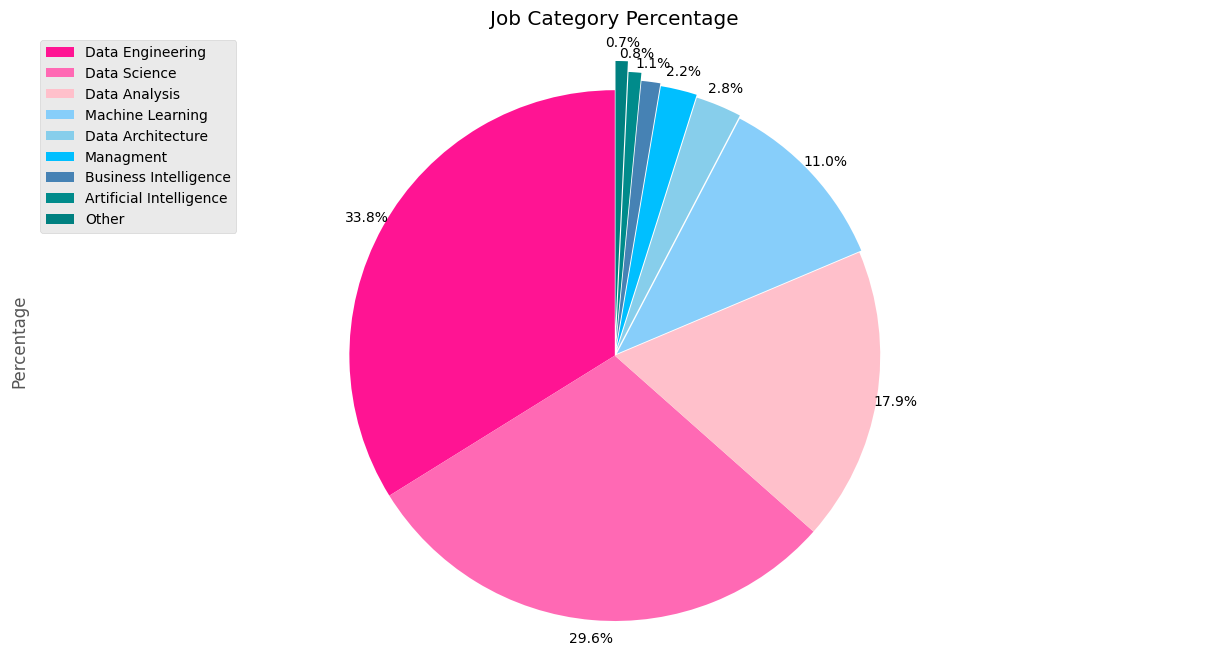

In [38]:
color_l = ['deeppink', 'hotpink', 'pink', 'lightskyblue', 'skyblue', 'deepskyblue', "steelblue", "darkcyan", "teal"]
explode_l = [0, 0, 0, 0.01, 0.02, 0.03, 0.04, 0.07, 0.11]
job_cat_per.plot(
    kind="pie",
    figsize=(15,8),
    autopct='%1.1f%%', 
    startangle=90,
    shadow=False,
    labels=None,
    pctdistance=1.07,
    colors=color_l,
    explode=explode_l
    )
plt.title("Job Category Percentage")
plt.axis("equal")
plt.ylabel("Percentage")
plt.legend(labels=job_cat_per.index, loc="upper left")
plt.show()

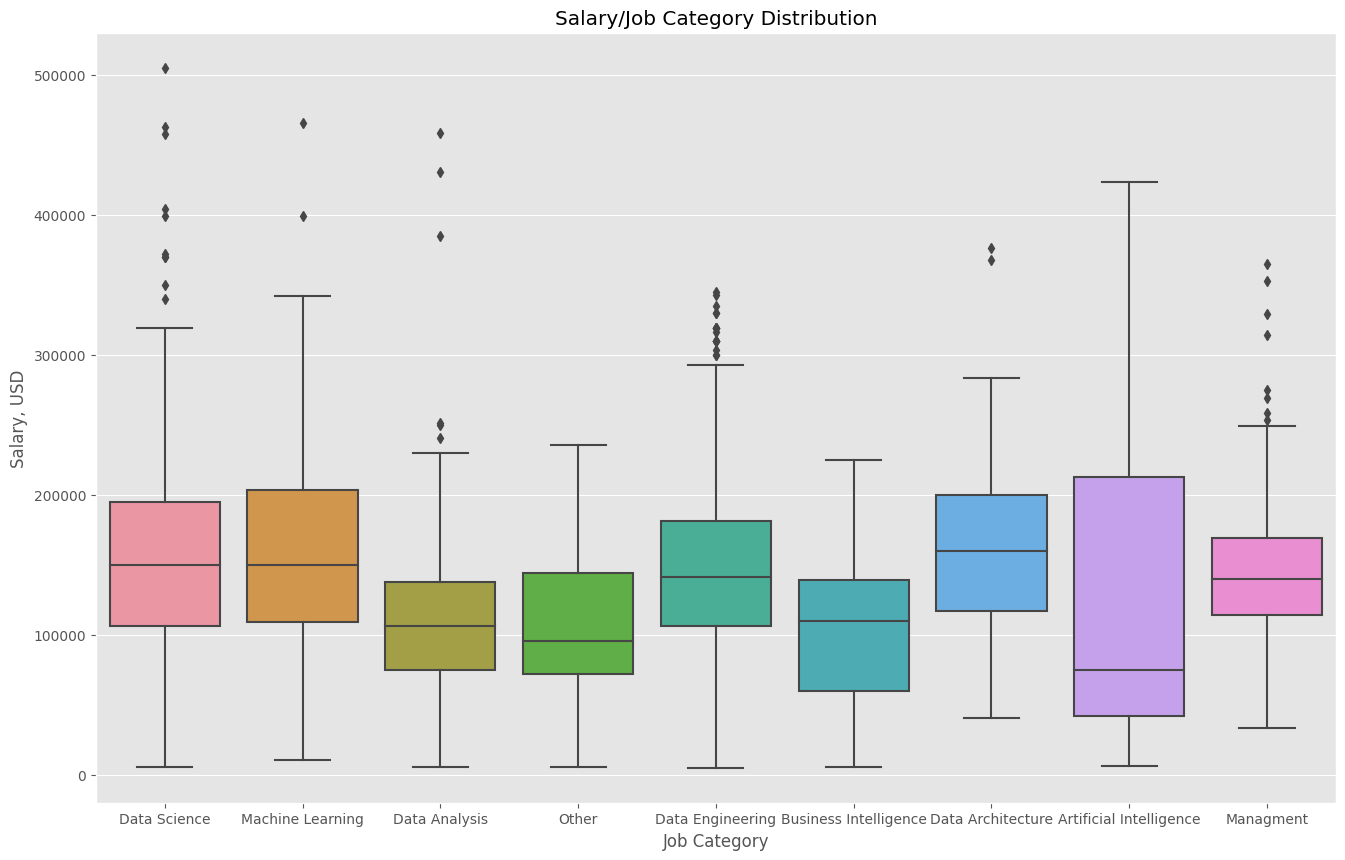

In [39]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[["job_category", "adjusted_salary_usd"]], x= "job_category", y = "adjusted_salary_usd")
plt.xlabel("Job Category")
plt.ylabel("Salary, USD")
plt.title("Salary/Job Category Distribution")
plt.show()

In [40]:
job_category_salary_data = df.groupby(by=["job_category"])[["job_category", "adjusted_salary_usd"]].describe().apply(np.round).droplevel(0, axis=1)
job_category_salary_data.idxmax()

count           Data Engineering
mean           Data Architecture
std      Artificial Intelligence
min            Data Architecture
25%            Data Architecture
50%            Data Architecture
75%      Artificial Intelligence
max                 Data Science
dtype: object

AI category has quite dispersive values. This can be treated as we need to split this category into something more specific, or there is just not enough data about this category. As we can tell from the Job Category distribution, the second option is our case. Interestingly enough, on average,  there are better salaries in Data Architecture, but since it's only 2% of all records, it still might be wrong to make such a statement. 

What we can say for sure is that the Data Science category has the most outliers in our dataset, and coupled with the fact that it is the second most popular job category in the sample, could tell us that there is a wide variety of salaries in this category. Also, the most paid job in our dataset is in DS category.

### 3.3 Salary Employment Type Distribution 

In [41]:
df["employment_type"].value_counts(normalize=True)*100

employment_type
Full-time    99.014647
Part-time     0.452730
Contract      0.266312
Freelance     0.266312
Name: proportion, dtype: float64

More than 99 percent of the presented job is full-time employment. So it will be really hard to make some valuable conclusions about other types.

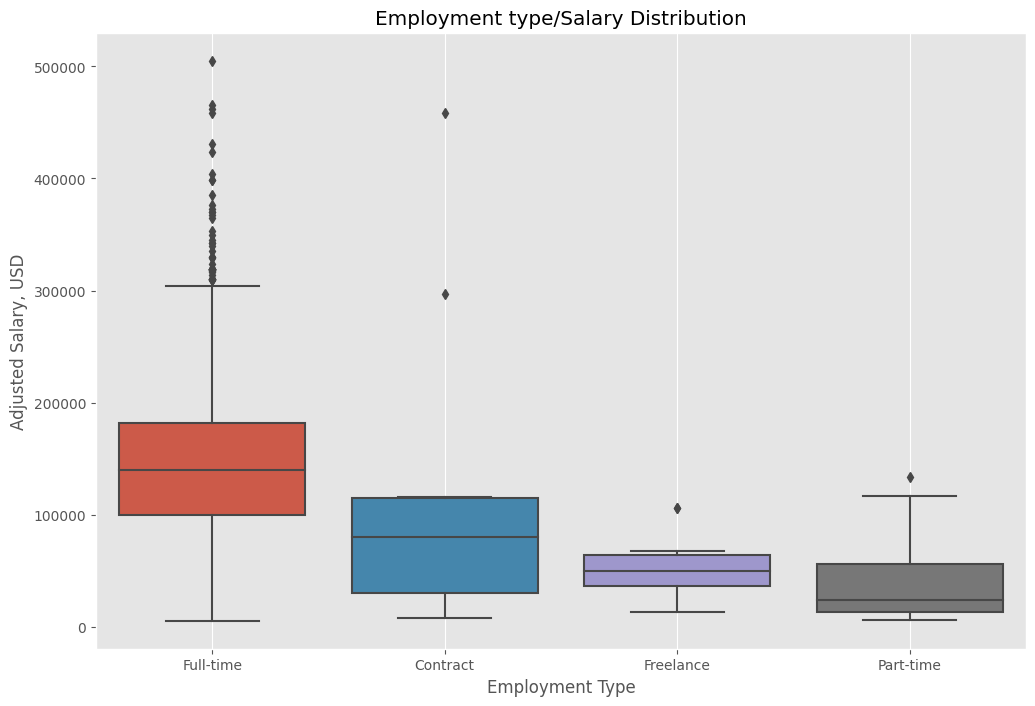

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data=df[["employment_type", "adjusted_salary_usd"]],
    x="employment_type", 
    y ="adjusted_salary_usd",
    )
plt.title("Employment type/Salary Distribution")
plt.xlabel("Employment Type")
plt.ylabel("Adjusted Salary, USD")
plt.grid()
plt.show()

### 3.4 Remote Ratio Distribution

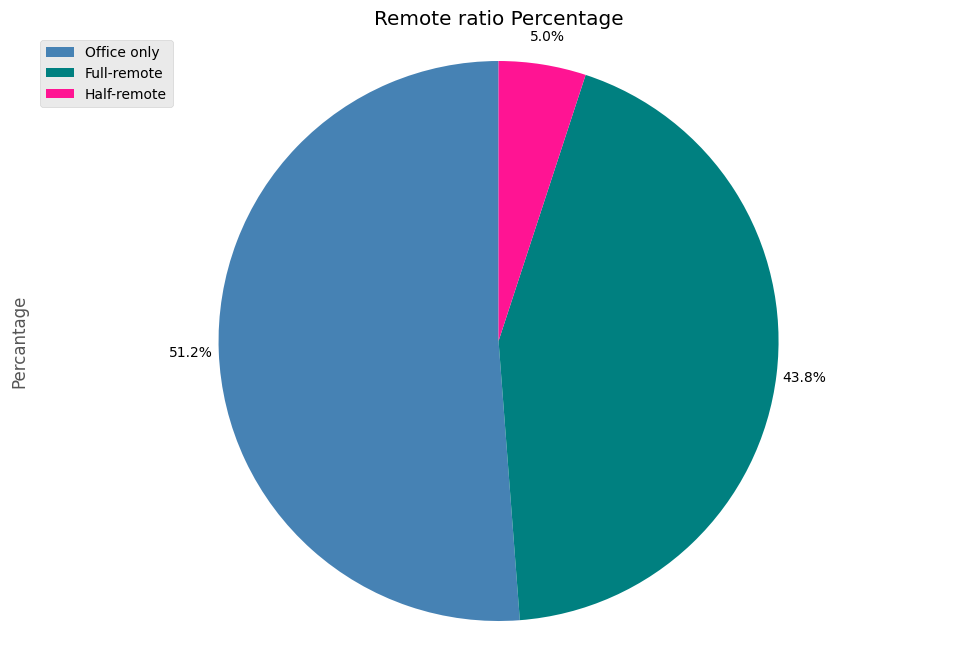

In [43]:
remote_per = df["remote_ratio"].value_counts(normalize=True)*100
remote_per.plot(
    kind="pie",
    figsize=(12,8),
    autopct='%1.1f%%', 
    startangle=90,
    shadow=False,
    labels=None,
    pctdistance=1.1,
    colors=["steelblue", "teal", "deeppink"],
)
plt.title("Remote ratio Percentage")
plt.ylabel("Percantage")
plt.axis("equal")
plt.legend(labels=remote_per.index, loc="upper left")
plt.show()

Text(0, 0.5, 'Salary, USD')

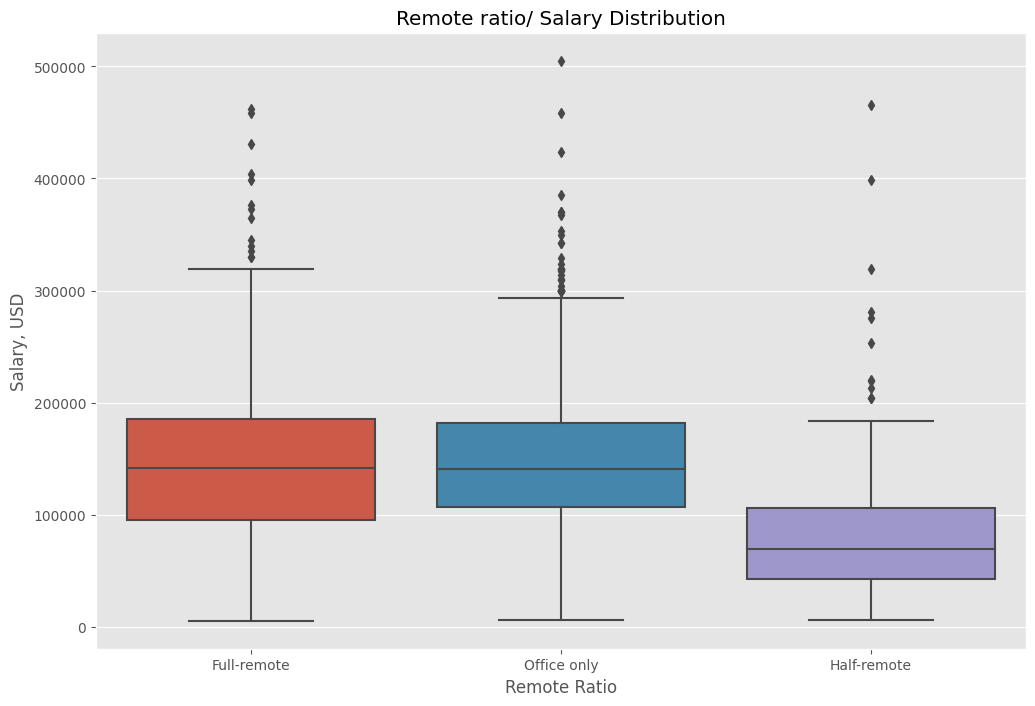

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(data= df[["remote_ratio", "adjusted_salary_usd"]], x="remote_ratio", y="adjusted_salary_usd")
plt.title("Remote ratio/ Salary Distribution")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary, USD")

In [45]:
remote_ratio_desc = df.groupby(by=["experience_level"])[["remote_ratio", "adjusted_salary_usd"]].describe().apply(lambda x: np.round(x,2)).adjusted_salary_usd
pivot_t = df.pivot_table(values= "adjusted_salary_usd",  index="remote_ratio", columns="experience_level", aggfunc="count")
for remote_r in pivot_t.columns.tolist():
    pivot_t[remote_r] = np.round(pivot_t[remote_r]/remote_ratio_desc.loc[remote_r, "count"]*100, 2)
pivot_t

experience_level,Entry level,Executive level,Mid/Intermediate level,Senior
remote_ratio,,,,
Full-remote,45.00,45.61,41.61,44.20
Half-remote,20.31,5.26,9.19,1.75
Office only,34.69,49.12,49.19,54.05


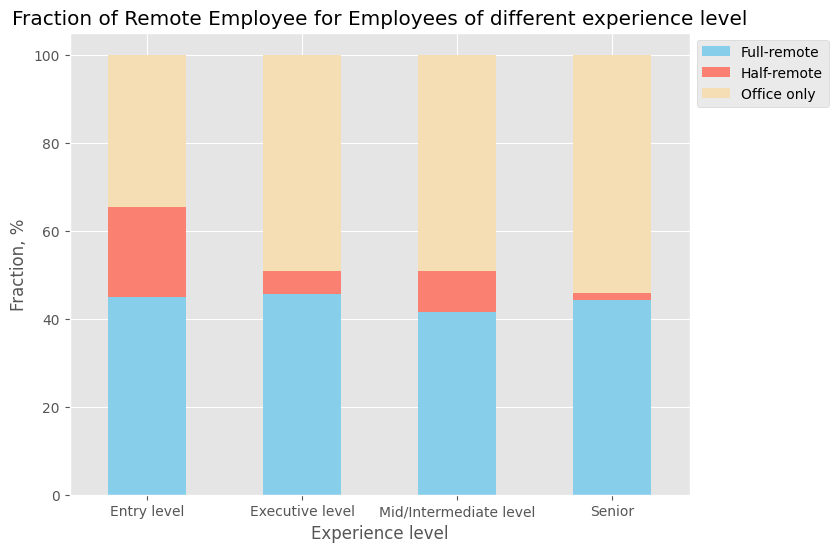

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
pivot_t.T.plot(kind="bar", stacked=True, color=["skyblue", "salmon", "wheat", "teal"], ax=ax, rot= 0)
ax.set(
    xlabel="Experience level",
    ylabel="Fraction, %",
    title = "Fraction of Remote Employee for Employees of different experience level"
)
ax.legend(bbox_to_anchor=(1, 1))


Office and remote employees are paid almost the same, but half-remote employees are paid less. We can see why that is if we take a look into remote fractions for every experience level. We can clearly see that Entry-level employees are more likely to work half remotely. But we need to find out what part of our data set is entry-level employees and if it's a small part these conclusions don't make any sense.

### 3.5 Experience level/Salary Distributions


In [47]:
exp_dist = df["experience_level"].value_counts(normalize=True)*100

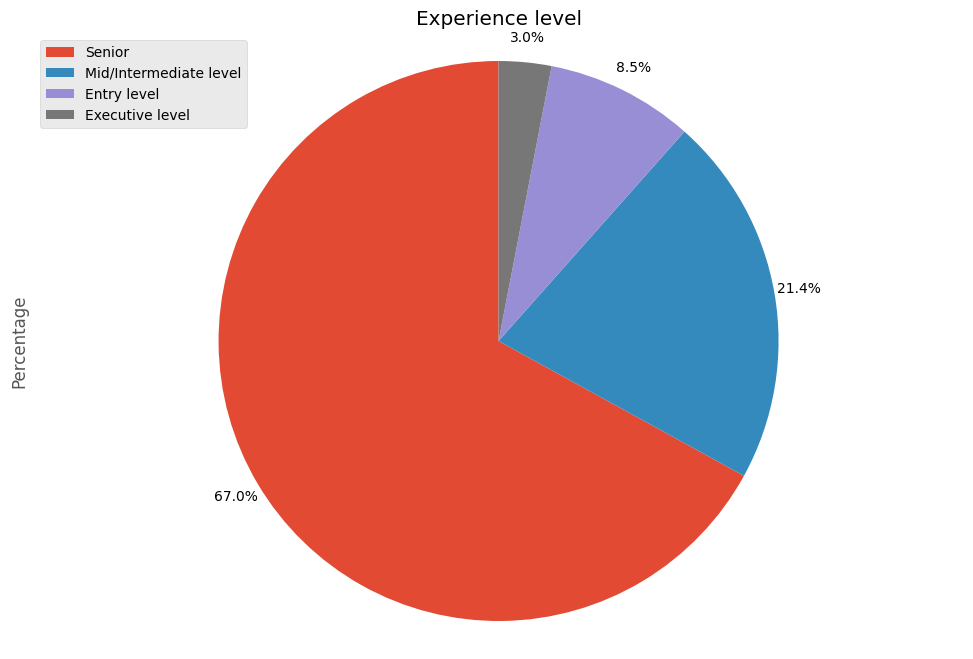

In [48]:
exp_dist.plot(
    kind = "pie",
    figsize = (12, 8),
    autopct="%1.1f%%",
    pctdistance=1.09,
    shadow=False,
    startangle=90,
    labels=None
    
    )
plt.title("Experience level")
plt.axis("equal")
plt.ylabel("Percentage")
plt.legend(labels=exp_dist.index, loc="upper left")
plt.show()

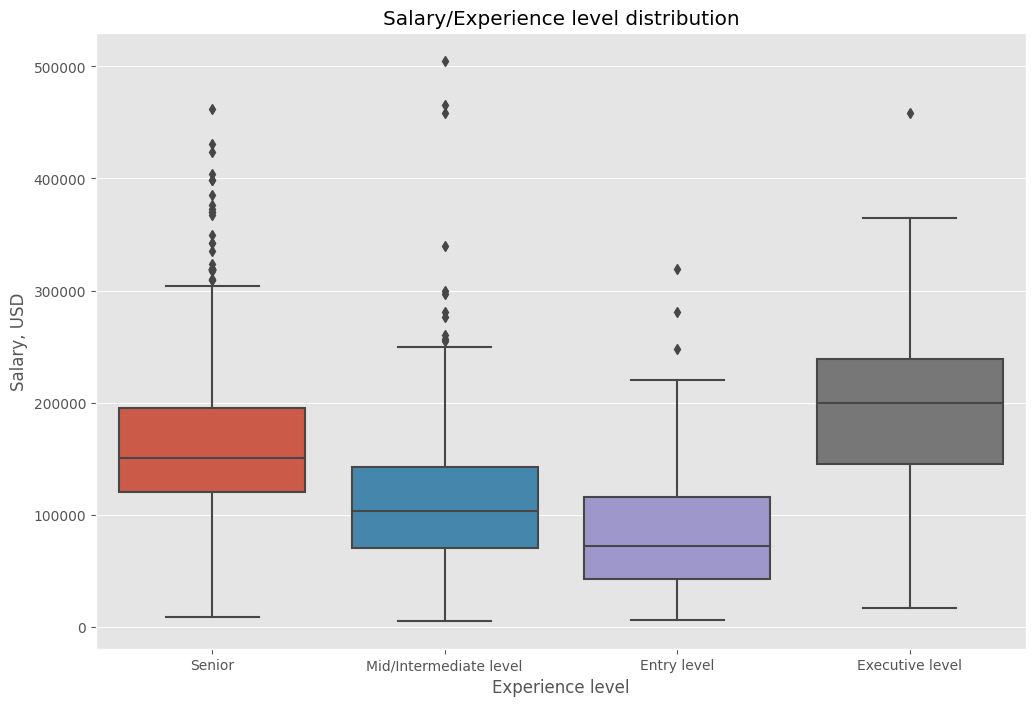

                         count       mean      min       max
experience_level                                            
Entry level              320.0   81917.30   5957.0  319200.0
Executive level          114.0  201367.85  16836.0  458116.0
Mid/Intermediate level   805.0  108809.57   5460.0  505073.0
Senior                  2516.0  157815.98   8512.0  462422.0


In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df[["experience_level", "adjusted_salary_usd"]], x="experience_level", y="adjusted_salary_usd")
plt.xlabel("Experience level")
plt.ylabel("Salary, USD")
plt.title("Salary/Experience level distribution")
plt.show()
print(df.groupby(by=["experience_level"])[["experience_level", "adjusted_salary_usd"]].describe().apply(lambda x: np.round(x,2)).adjusted_salary_usd[["count", "mean", "min","max"]]
)

In [50]:
job_category_desc = df.groupby(by=["job_category"])[["experience_level", "adjusted_salary_usd"]].describe().apply(lambda x: np.round(x,2)).adjusted_salary_usd
pivot_t = df.pivot_table(values= "adjusted_salary_usd",  index="experience_level", columns="job_category", aggfunc="count")
for job_cat in pivot_t.columns.tolist():
    pivot_t[job_cat] = np.round(pivot_t[job_cat]/job_category_desc.loc[job_cat, "count"]*100, 2)
pivot_t.fillna(0, inplace=True)
pivot_t

job_category,Artificial Intelligence,Business Intelligence,Data Analysis,Data Architecture,Data Engineering,Data Science,Machine Learning,Managment,Other
experience_level,,,,,,,,,
Entry level,51.72,27.91,11.31,0.00,7.16,7.55,8.74,2.41,14.29
Executive level,3.45,2.33,0.45,1.90,4.72,1.80,0.49,30.12,0.00
Mid/Intermediate level,24.14,20.93,28.57,6.67,19.91,18.88,25.24,20.48,21.43
Senior,20.69,48.84,59.67,91.43,68.21,71.76,65.53,46.99,64.29


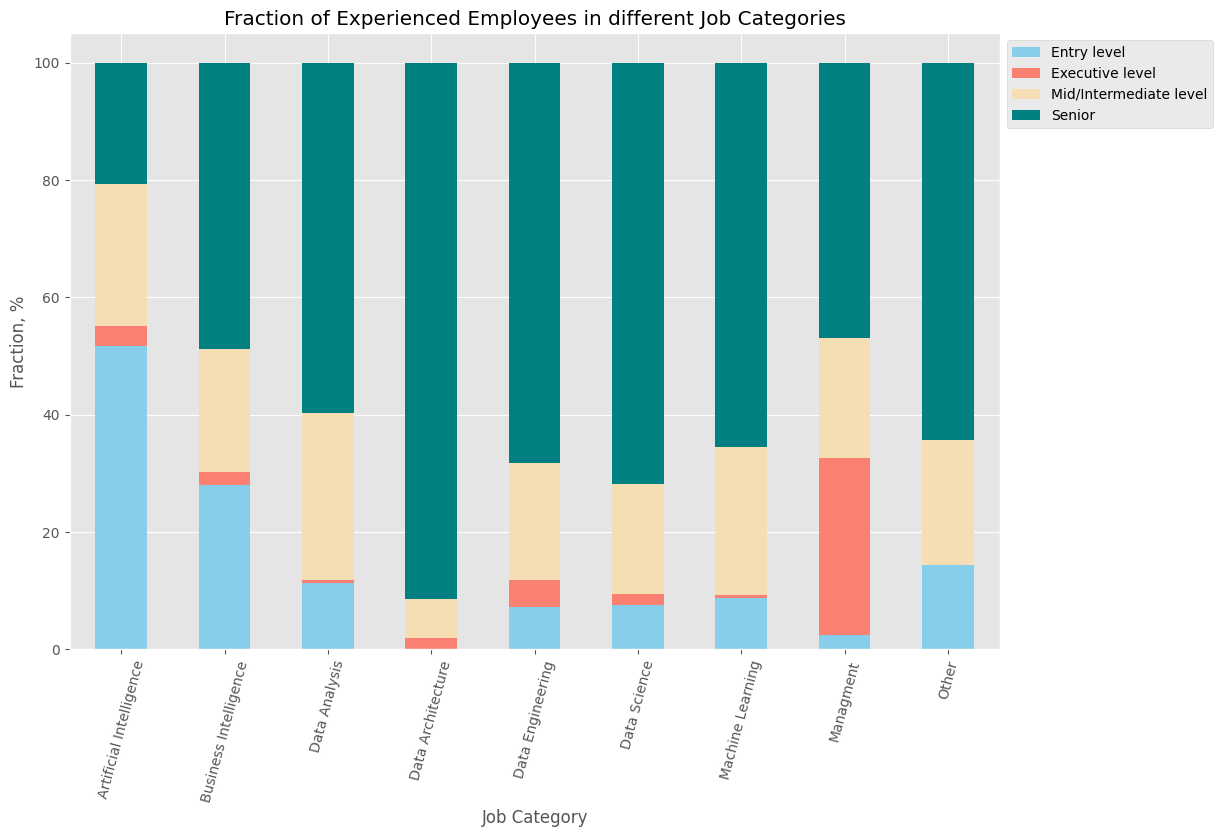

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
pivot_t.T.plot(kind="bar", stacked=True, color=["skyblue", "salmon", "wheat", "teal"], ax=ax, rot= 0)
ax.set(
    xlabel="Job Category",
    ylabel="Fraction, %",
    title = "Fraction of Experienced Employees in different Job Categories"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', labelrotation = 75)


As expected, Senior level Employees are more in demand than others. But the most interesting part is that there are almost no Juniors in Data Architecture. Even considering that there are less than 3% of the data set is Data Architecture it is still about 100 records.  

On the other hand, about half of Employees in AI are Entry-level. But taking into account that there is less than 1 percent of AI employees in this dataset may cause some questions about the usability of this distribution.

### 3.6 Company size Details

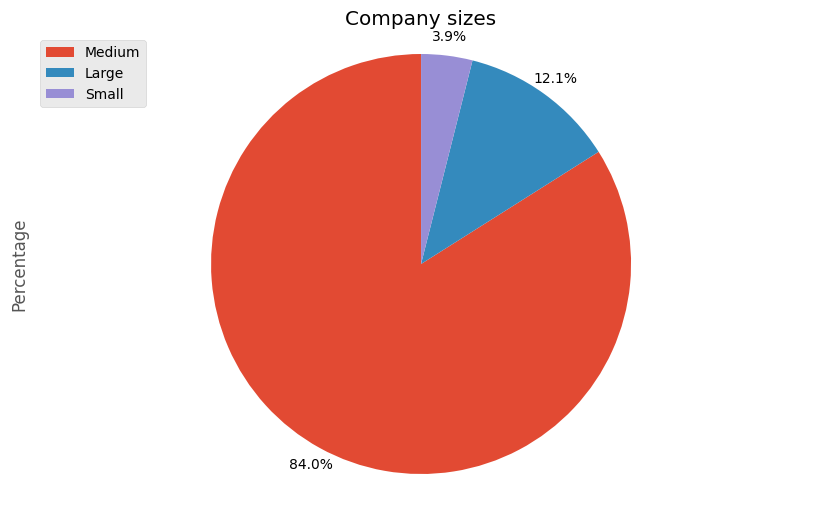

In [52]:
company_size_dist = df["company_size"].value_counts(normalize=True)*100
company_size_dist.plot(
    kind = "pie",
    figsize = (10, 6),
    autopct="%1.1f%%",
    pctdistance=1.09,
    shadow=False,
    startangle=90,
    labels=None
    
    )
plt.title("Company sizes")
plt.axis("equal")
plt.ylabel("Percentage")
plt.legend(labels=company_size_dist.index, loc="upper left")
plt.show()

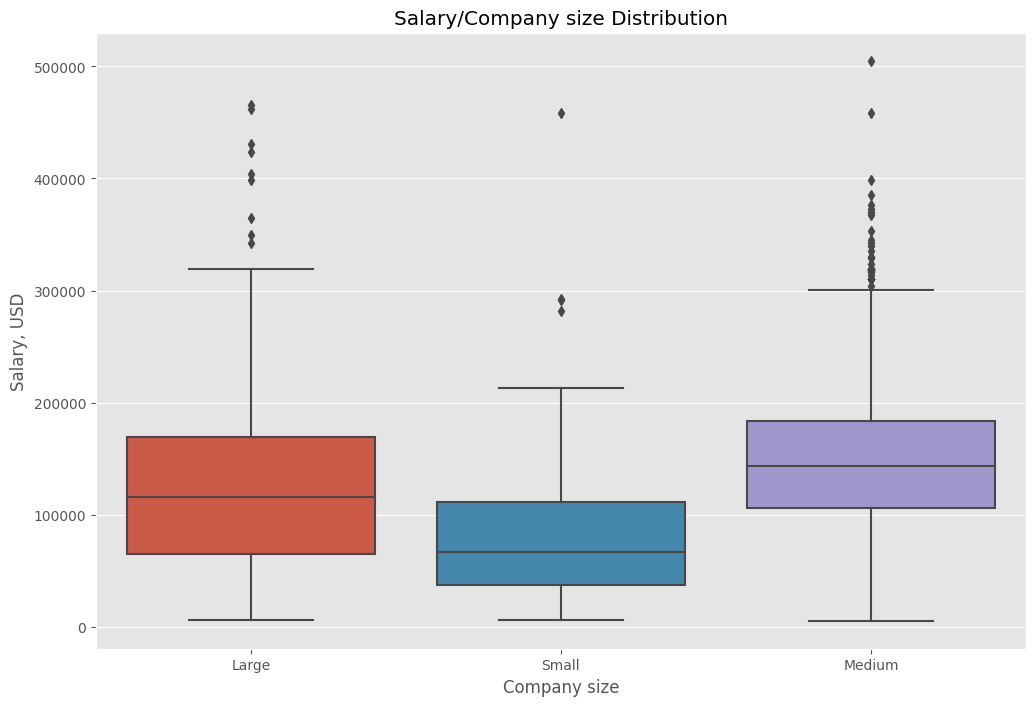

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data = df[["company_size", "adjusted_salary_usd"]], x="company_size", y="adjusted_salary_usd")
ax.set(
    xlabel="Company size",
    ylabel="Salary, USD",
    title = "Salary/Company size Distribution"
    )
plt.show()

In [54]:
company_size_desc = df.groupby(by=["company_size"])[["company_size", "adjusted_salary_usd"]].describe().apply(lambda x: np.round(x,2)).adjusted_salary_usd
pivot_t = df.pivot_table(values= "adjusted_salary_usd", index="remote_ratio", columns="company_size", aggfunc="count")
for c_size in pivot_t.columns.tolist():
    pivot_t[c_size] = np.round(pivot_t[c_size]/company_size_desc.loc[c_size, "count"]*100, 2)
pivot_t

company_size,Large,Medium,Small
remote_ratio,,,
Full-remote,48.46,42.25,61.49
Half-remote,24.23,1.49,21.62
Office only,27.31,56.26,16.89


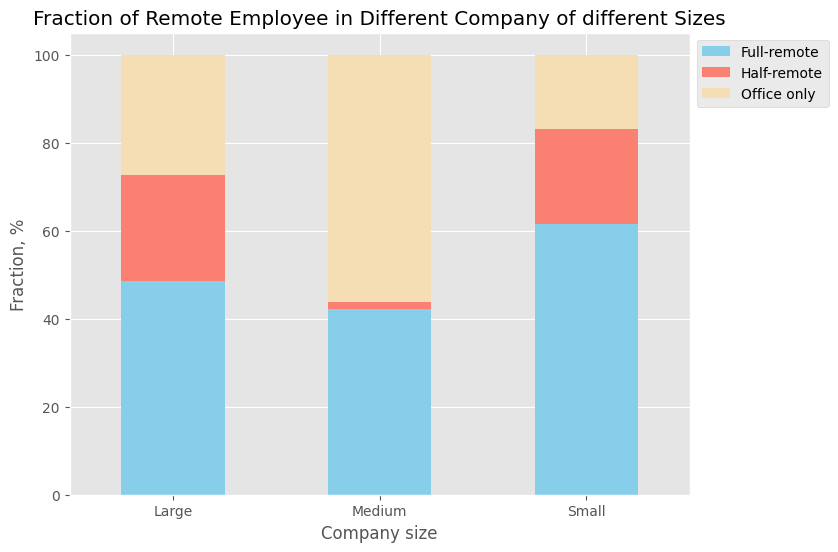

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
pivot_t.T.plot(kind="bar", stacked=True, color=["skyblue", "salmon", "wheat"], ax=ax, rot= 0)
ax.set(
    xlabel="Company size",
    ylabel="Fraction, %",
    title = "Fraction of Remote Employee in Different Company of different Sizes"
)
ax.legend(bbox_to_anchor=(1, 1))


In [56]:
pivot_t = df.pivot_table(values= "adjusted_salary_usd", index="experience_level", columns="company_size", aggfunc="count")
for c_size in pivot_t.columns.tolist():
    pivot_t[c_size] = np.round(pivot_t[c_size]/company_size_desc.loc[c_size, "count"]*100, 2)
pivot_t

company_size,Large,Medium,Small
experience_level,,,
Entry level,22.03,5.42,33.11
Executive level,2.86,3.01,4.05
Mid/Intermediate level,29.52,19.70,33.78
Senior,45.59,71.87,29.05


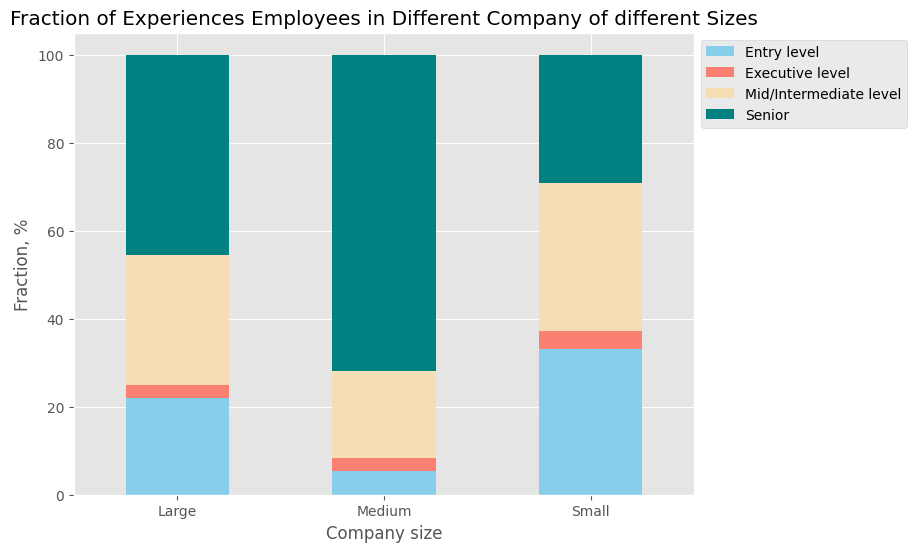

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
pivot_t.T.plot(kind="bar", stacked=True, color=["skyblue", "salmon", "wheat", "teal"], ax=ax, rot= 0)
ax.set(
    xlabel="Company size",
    ylabel="Fraction, %",
    title = "Fraction of Experiences Employees in Different Company of different Sizes"
)
ax.legend(bbox_to_anchor=(1, 1))

Most part of companies is mid-sized. Large and mid-sized companies offer quite similar payment wages but it seems like the large companies have a wider range of salaries.

Interestingly, small companies give more opportunities for employees to work remotely and also give opportunities for entry-level employees. Such a distribution can be the reason for what we can see in the boxplot diagram, where small companies seem to pay less than others, but it's just a consequence that they have more juniors.  

### 3.7 Company location/Employee Residence Distribution 


In [58]:
company_region = df["company_location_region"].value_counts(normalize=True)*100
employee_region = df["employee_residence_region"].value_counts(normalize=True)*100
print(company_region)
print(employee_region)

company_location_region
Americas    84.367510
Europe      12.197071
Asia         2.583222
Oceania      0.479361
Africa       0.372836
Name: proportion, dtype: float64
employee_residence_region
Americas    83.621838
Europe      12.383489
Asia         3.169108
Africa       0.452730
Oceania      0.372836
Name: proportion, dtype: float64


In [59]:
df.company_location_country_name.value_counts(normalize=True).head(10)*100

company_location_country_name
United States     80.958722
United Kingdom     4.580559
Canada             2.316911
Spain              2.050599
India              1.544607
Germany            1.491345
France             0.905459
Brazil             0.399467
Australia          0.372836
Greece             0.372836
Name: proportion, dtype: float64

In [60]:
remote_ration_in_region = df.groupby(by=["company_location_region"])[["remote_ratio", "adjusted_salary_usd"]].describe().apply(lambda x: np.round(x,2)).adjusted_salary_usd
pivot_t = df.pivot_table(values= "adjusted_salary_usd", index="remote_ratio", columns="company_location_region", aggfunc="count")
for r_ratio in pivot_t.columns.tolist():
    pivot_t[r_ratio] = np.round(pivot_t[r_ratio]/remote_ration_in_region.loc[r_ratio, "count"]*100, 2)
pivot_t

company_location_region,Africa,Americas,Asia,Europe,Oceania
remote_ratio,,,,,
Full-remote,71.43,44.48,44.33,37.55,50.00
Half-remote,14.29,1.74,35.05,20.09,33.33
Office only,14.29,53.79,20.62,42.36,16.67


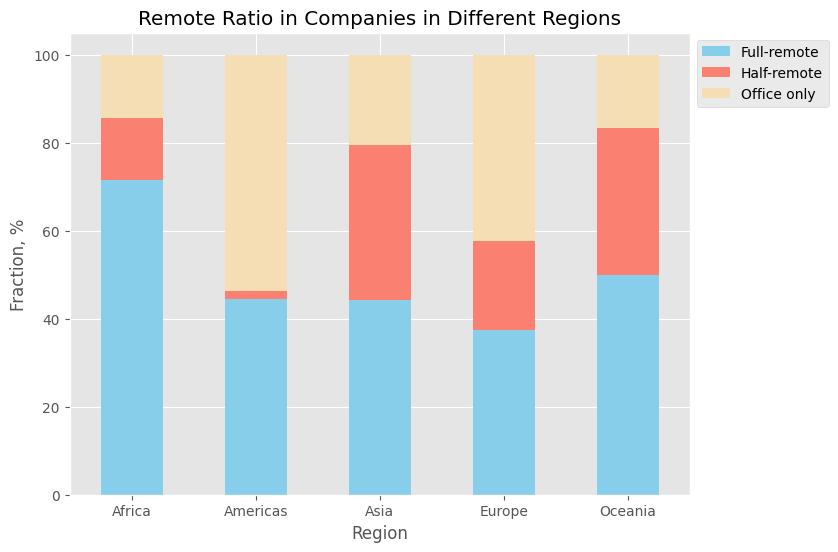

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
pivot_t.T.plot(kind="bar", stacked=True, color=["skyblue", "salmon", "wheat"], ax=ax, rot= 0)
ax.set(
    xlabel="Region",
    ylabel="Fraction, %",
    title = "Remote Ratio in Companies in Different Regions"
)
ax.legend(bbox_to_anchor=(1, 1))

In [62]:
remote_ration_in_region = df.groupby(by=["employee_residence_region"])[["remote_ratio", "adjusted_salary_usd"]].describe().apply(lambda x: np.round(x,2)).adjusted_salary_usd
pivot_t = df.pivot_table(values= "adjusted_salary_usd", index="remote_ratio", columns="employee_residence_region", aggfunc="count")
for r_ratio in pivot_t.columns.tolist():
    pivot_t[r_ratio] = np.round(pivot_t[r_ratio]/remote_ration_in_region.loc[r_ratio, "count"]*100, 2)
pivot_t

employee_residence_region,Africa,Americas,Asia,Europe,Oceania
remote_ratio,,,,,
Full-remote,64.71,44.20,49.58,38.49,42.86
Half-remote,17.65,1.62,31.93,19.57,42.86
Office only,17.65,54.17,18.49,41.94,14.29


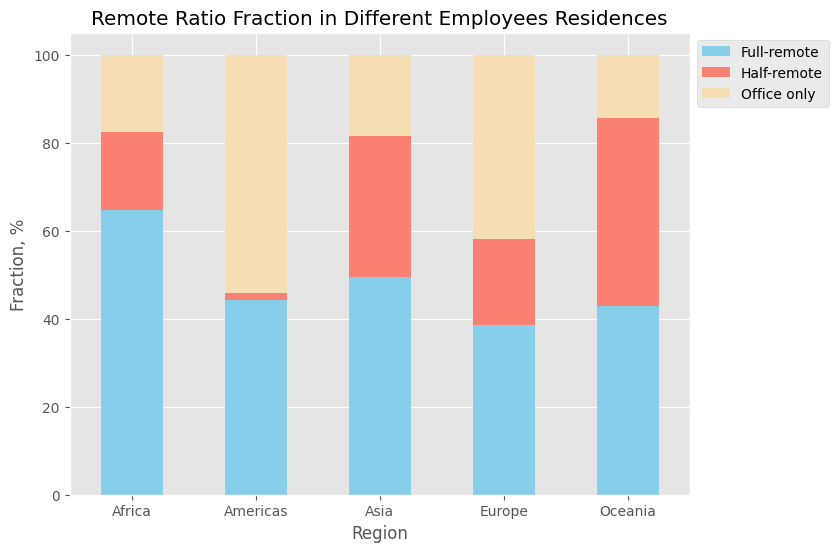

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
pivot_t.T.plot(kind="bar", stacked=True, color=["skyblue", "salmon", "wheat"], ax=ax, rot= 0)
ax.set(
    xlabel="Region",
    ylabel="Fraction, %",
    title = "Remote Ratio Fraction in Different Employees Residences"
)
ax.legend(bbox_to_anchor=(1, 1))

Most employees presented in this dataset work and live in the US, more than 80 percent. 

Besides that, the remote ratio for employee residence and company locations is quite similar. Most Asia, Oceania, and Africa employees work either remotely or half remotely, while in Americas region most employees work in the office.

And let's take a look at Employee residence country and Company location Salaries.

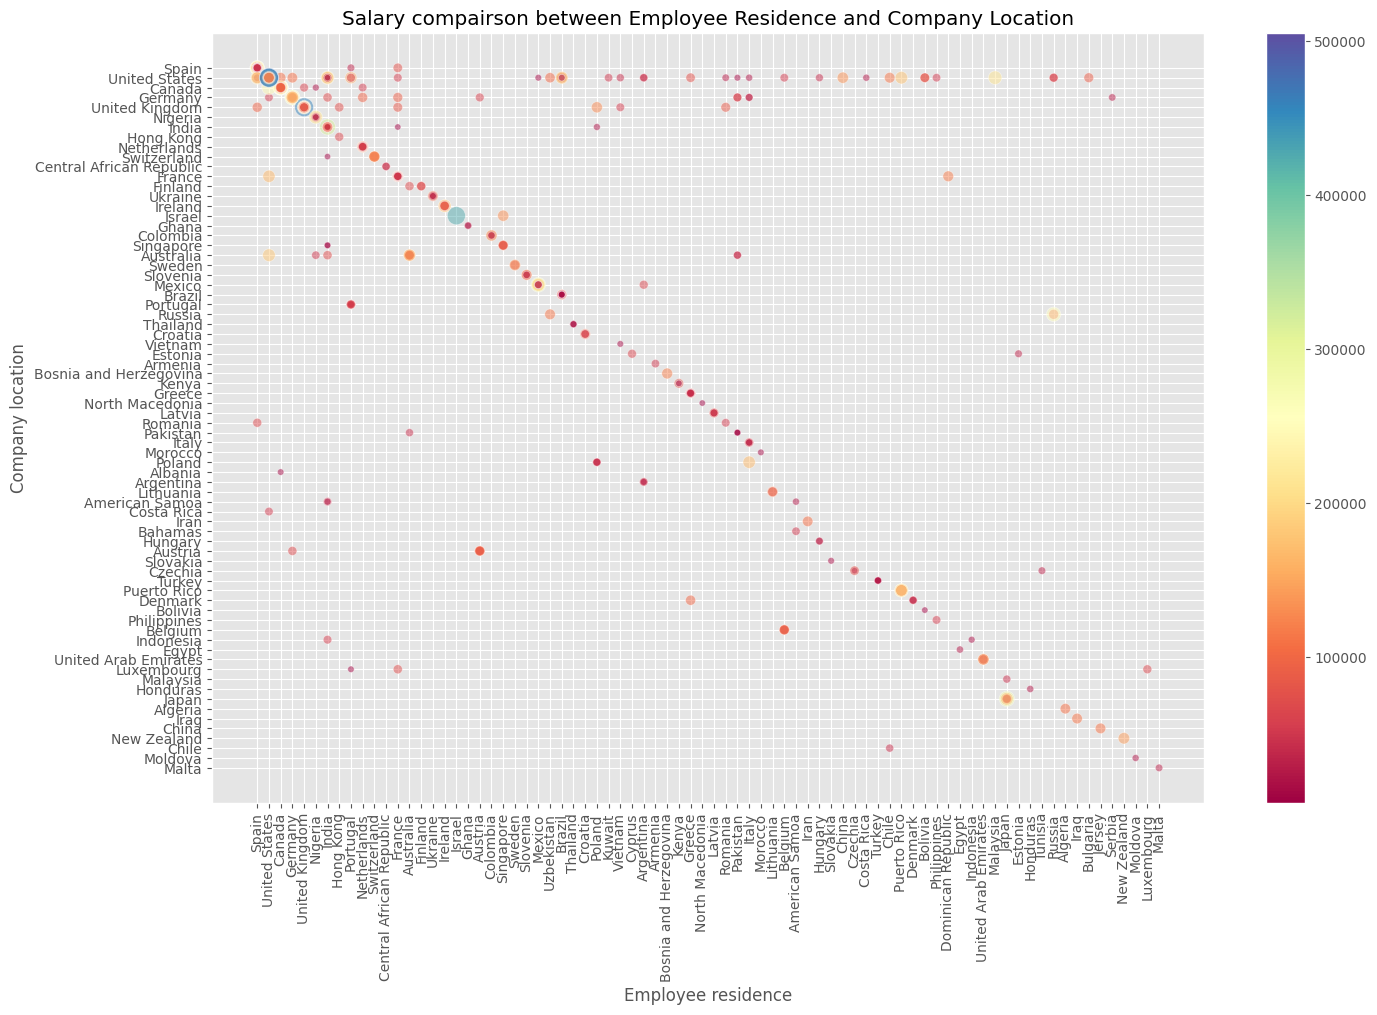

In [64]:
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(data=df, x="employee_residence_country_name", y = "company_location_country_name",size="adjusted_salary_usd", hue = "adjusted_salary_usd", alpha=0.5, palette="Spectral", sizes=(20,200))
norm = plt.Normalize(df.adjusted_salary_usd.min(), df.adjusted_salary_usd.max())
sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm)
ax.get_legend().remove()
plt.xticks(rotation=90)
plt.ylabel("Company location")
plt.xlabel("Employee residence")
plt.title("Salary compairson between Employee Residence and Company Location")
plt.show()

Pretty confusing, isn't it? Let's bring some clarence into this.

First of all, let's analyze data for each region separately.

Then onto the comparison plot let's add the average salary for countries.

#### 3.7.1 Americas Region

First of all, lets plot countplot for all countries besides the US for an obvious reason. 

In [65]:
americas_df = df[df["company_location_region"]=="Americas"]

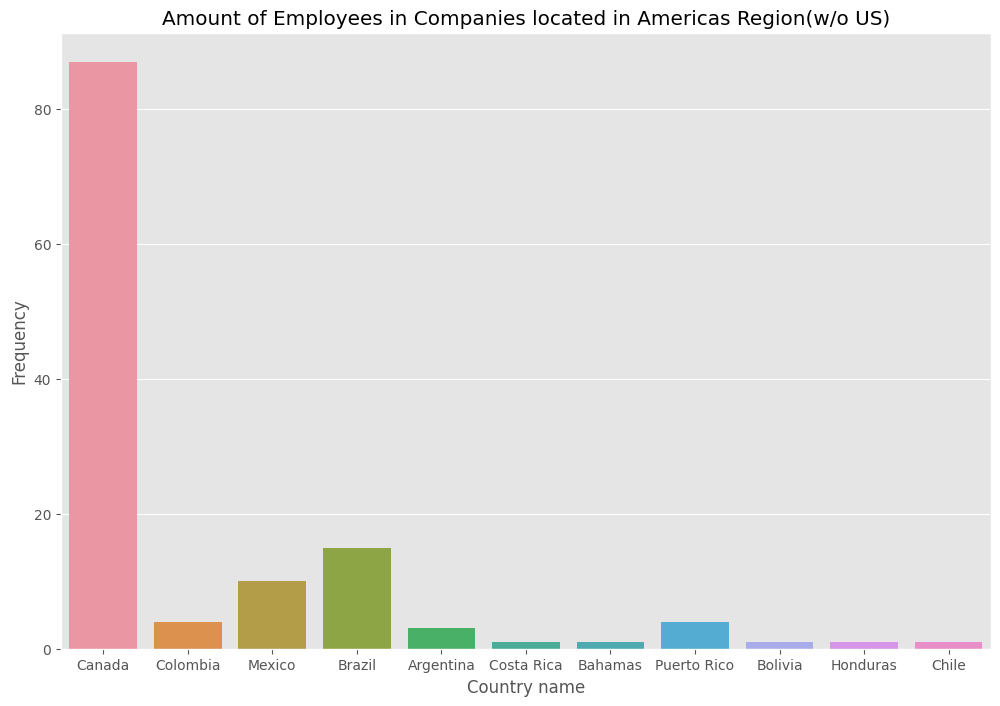

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data = americas_df[americas_df["company_location_country_code"]!="US"], x = "company_location_country_name")
ax.set(xlabel="Country name", ylabel="Frequency", title="Amount of Employees in Companies located in Americas Region(w/o US)")
plt.show()

In [67]:
top5_countries_in_americas =americas_df.company_location_country_name.value_counts().head(5)
top5_countries_in_americas

company_location_country_name
United States    3040
Canada             87
Brazil             15
Mexico             10
Colombia            4
Name: count, dtype: int64

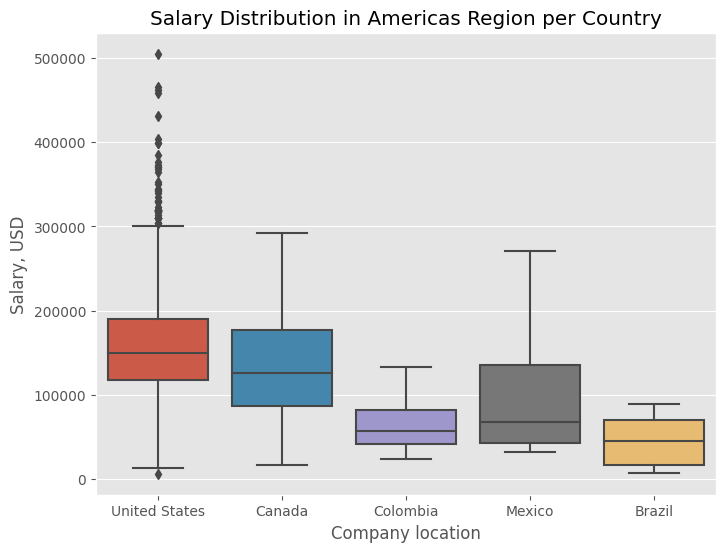

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=americas_df[ americas_df["company_location_country_name"].isin(top5_countries_in_americas.index.tolist())], x = "company_location_country_name", y = "adjusted_salary_usd")

ax.set(xlabel="Company location", ylabel="Salary, USD", title="Salary Distribution in Americas Region per Country")
plt.show()

In [69]:
avg_ds_sal_america = pd.DataFrame(americas_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
avg_ds_sal_america.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
avg_ds_sal_america["ds"]=True
avg_sal_america = df_2023_avg_income[df_2023_avg_income["country_name"].isin(americas_df["company_location_country_name"].unique())]
avg_sal_america.drop(columns=["Rank", "month_income_usd"], inplace=True)
avg_sal_america.rename(columns={"country_name":"company_country_name","year_income_usd":"average_salary"}, inplace=True)
avg_sal_america["employee_residence_country_name"] = avg_sal_america.company_country_name
avg_sal_america["ds"]=False
avg_ds_sal_america = pd.concat([avg_ds_sal_america, avg_sal_america])
avg_ds_sal_america.sample(5)

,company_country_name,employee_residence_country_name,average_salary,ds
4,Canada,Canada,139063.0,True
38,United States,Romania,28638.0,True
21,United States,Canada,106400.0,True
8,Canada,United States,247779.0,True
28,United States,Hungary,39930.0,True


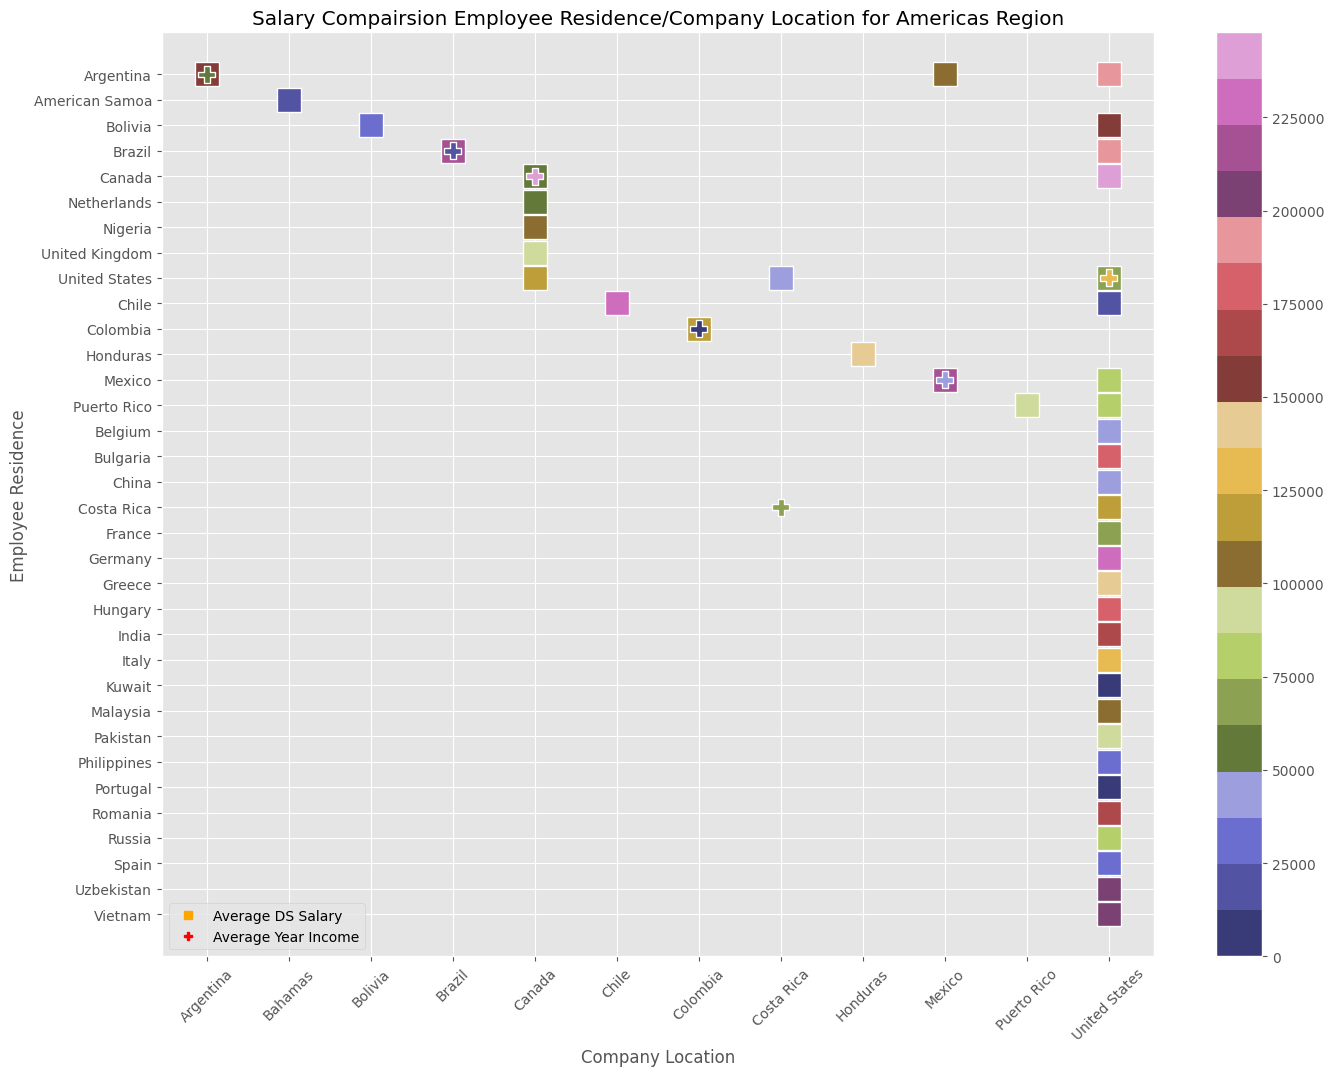

In [70]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.scatterplot(
    data = avg_ds_sal_america,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, avg_ds_sal_america.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, avg_ds_sal_america.average_salary.max(), 25000))
ax.tick_params(axis='x', labelrotation = 45)
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Americas Region"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



A lot of employees all over the world work in US companies. Mostly their salaries are bigger than in their residence. Let's take a closer look onto US itself.

In [71]:
US_data=df[df["company_location_country_code"]=="US"]
(US_data[US_data["employee_residence_country_code"]!="US"]["employee_residence_country_name"].value_counts(normalize = True)*100).head(10)

employee_residence_country_name
India        17.073171
Brazil        7.317073
Spain         7.317073
Russia        4.878049
Bolivia       4.878049
Portugal      4.878049
Argentina     4.878049
Belgium       2.439024
Greece        2.439024
Italy         2.439024
Name: proportion, dtype: float64

[Text(0.5, 0, 'Employee residence'),
 Text(0, 0.5, 'Salary, USD'),
 Text(0.5, 1.0, 'Top 5 Employees Residence Countries who works in US Companies')]

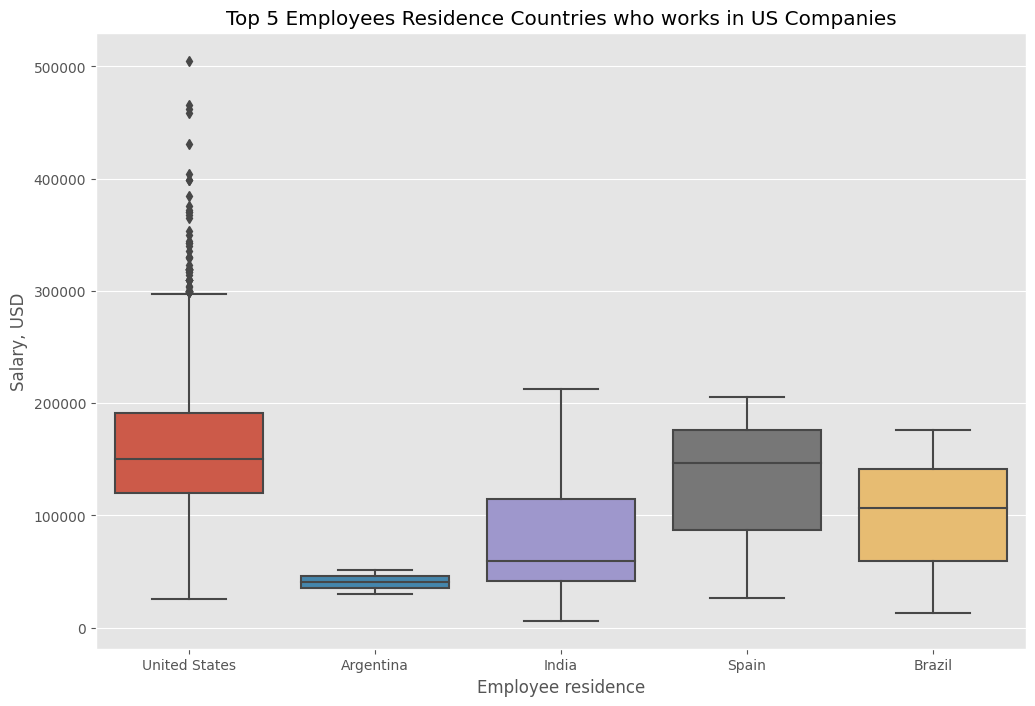

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(
    data=US_data[US_data["employee_residence_country_name"].isin(US_data["employee_residence_country_name"].value_counts().head(5).index.tolist())],
    x = "employee_residence_country_name", 
    y="adjusted_salary_usd",
    )

ax.set(
    xlabel="Employee residence",
    ylabel="Salary, USD",
    title = "Top 5 Employees Residence Countries who works in US Companies"
)

As we can tell 2 out of 5 countries in the top 5 are from different regions!

If we talking about employees, not from the US, India is 17 percent! Besides the fact that amount of US Employees here is overwhelmingly bigger, it is an interesting result.

Also, we definitely can tell that local employees in the US are paid more.

#### 3.7.2 Europe

In [73]:
europe_df = df[df["company_location_region"]=="Europe"]


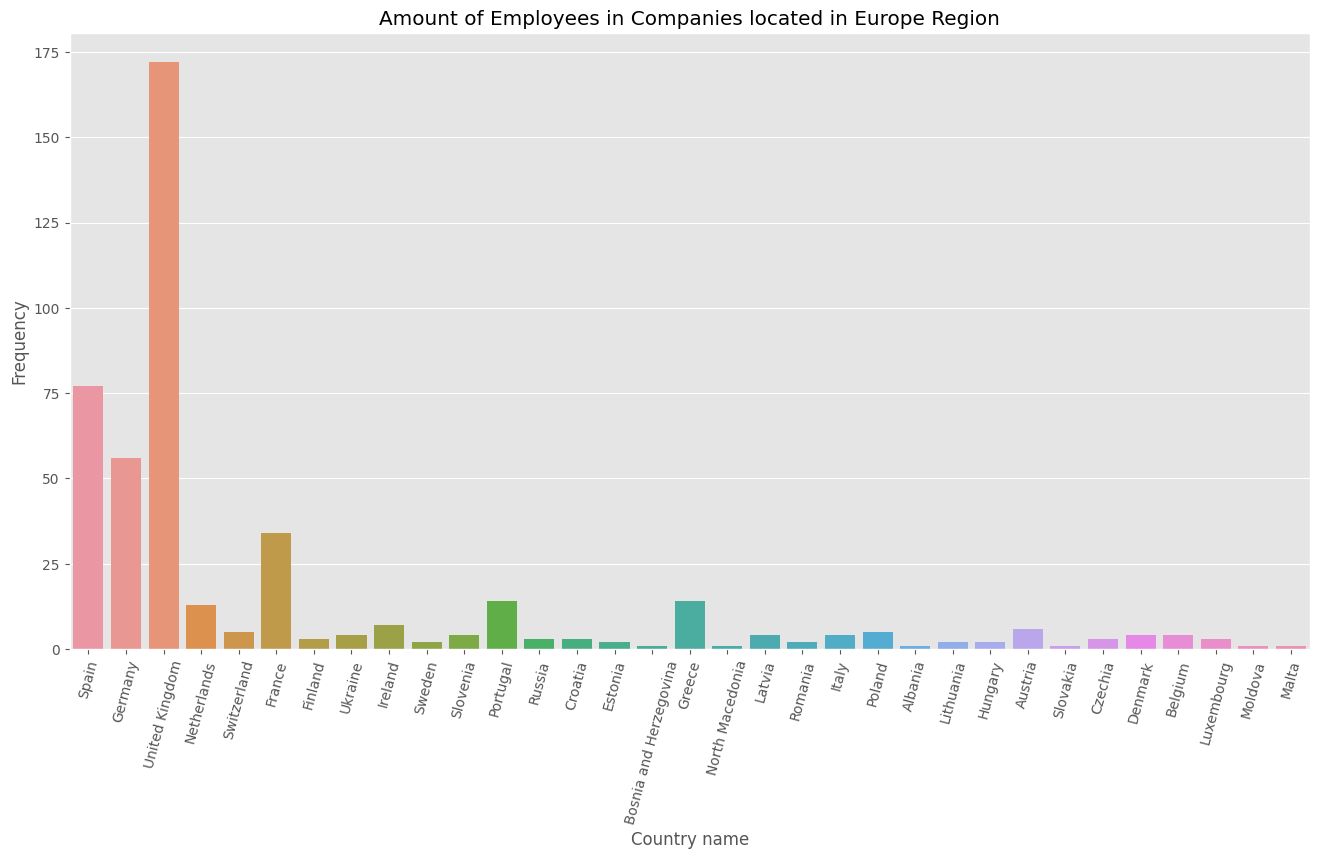

In [74]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data =europe_df, x = "company_location_country_name")
ax.set(xlabel="Country name", ylabel="Frequency", title="Amount of Employees in Companies located in Europe Region")
ax.tick_params(axis='x', labelrotation = 75)

plt.show()

In [75]:
top5_europe_countries = europe_df["company_location_country_name"].value_counts().head(5)
top5_europe_countries

company_location_country_name
United Kingdom    172
Spain              77
Germany            56
France             34
Portugal           14
Name: count, dtype: int64

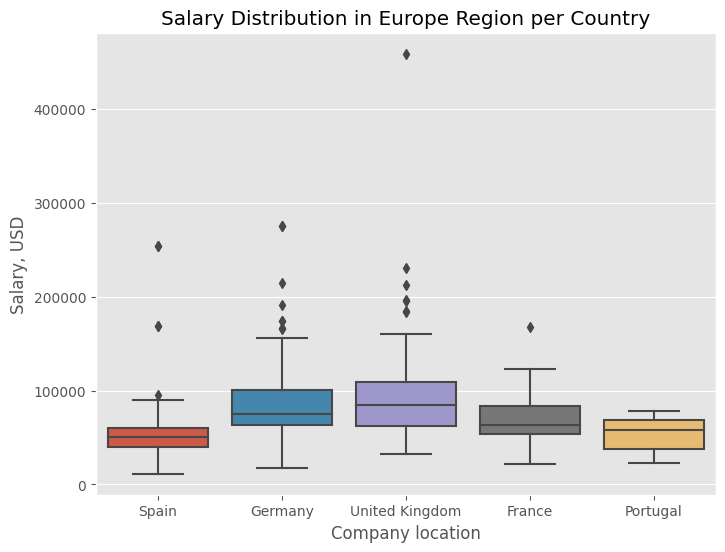

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(
    data=europe_df[europe_df["company_location_country_name"].isin(top5_europe_countries.index.tolist())],
    x = "company_location_country_name",
    y = "adjusted_salary_usd"
    )

ax.set(xlabel="Company location", ylabel="Salary, USD", title="Salary Distribution in Europe Region per Country")
plt.show()

Why there are such smaller salaries in spain?

In [77]:
experience_level_in_europe = europe_df[europe_df["company_location_country_name"].isin(top5_europe_countries.index.tolist())]\
    .groupby(by=["company_location_country_name"])[["experience_level", "adjusted_salary_usd"]]\
        .describe()\
            .apply(lambda x: np.round(x,2)).adjusted_salary_usd
pivot_t = europe_df[europe_df["company_location_country_name"].isin(top5_europe_countries.index.tolist())]\
    .pivot_table(values= "adjusted_salary_usd", index="experience_level", columns="company_location_country_name", aggfunc="count")
for exp_level in pivot_t.columns.tolist():
    pivot_t[exp_level] = np.round(pivot_t[exp_level]/experience_level_in_europe.loc[exp_level, "count"]*100, 2)
pivot_t.fillna(0, inplace=True)
pivot_t

company_location_country_name,France,Germany,Portugal,Spain,United Kingdom
experience_level,,,,,
Entry level,26.47,35.71,14.29,6.49,7.56
Executive level,0.00,3.57,0.00,2.60,1.16
Mid/Intermediate level,41.18,33.93,14.29,25.97,68.02
Senior,32.35,26.79,71.43,64.94,23.26


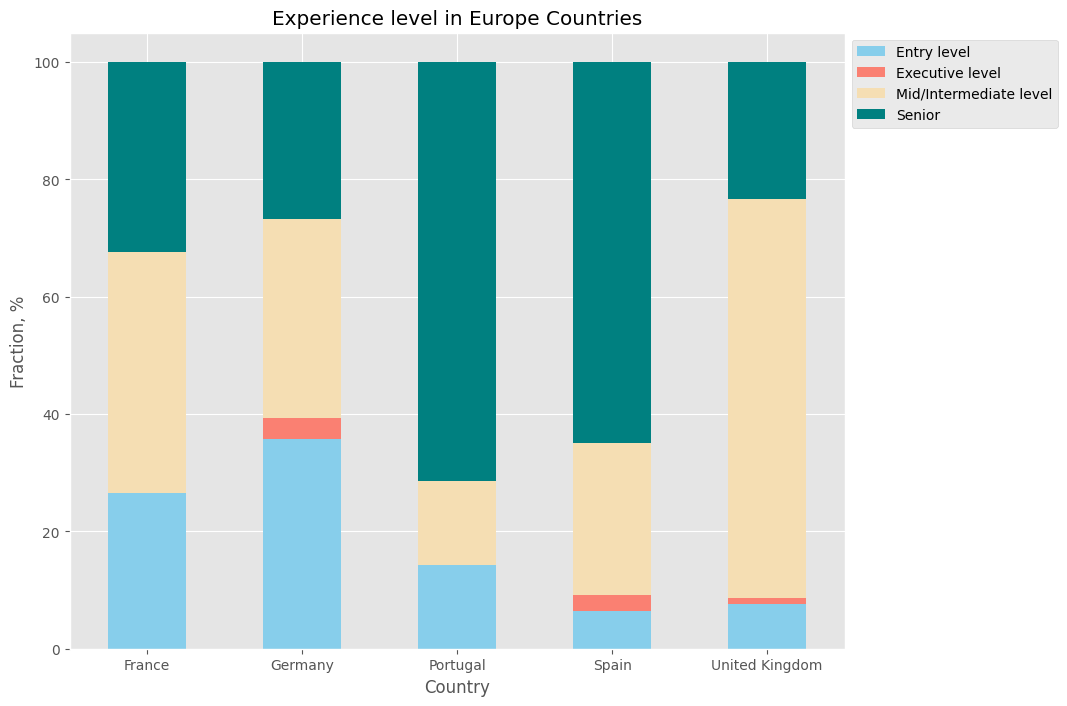

In [78]:
fig, ax = plt.subplots(figsize=(10, 8))
pivot_t.T.plot(kind="bar", stacked=True, color=["skyblue", "salmon", "wheat", "teal"], ax=ax, rot= 0)
ax.set(
    xlabel="Country",
    ylabel="Fraction, %",
    title = "Experience level in Europe Countries"
)
ax.legend(bbox_to_anchor=(1, 1))

Although Spain and Portugal have the most senior-level ratio in this list, they are less-paid countries in the whole top 5! It is a very interesting result, maybe a comparison plot will make things easier to understand.

In [79]:
avg_europe_sal_ds = pd.DataFrame(europe_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
avg_europe_sal_ds.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
avg_europe_sal_ds["ds"]=True
avg_sal_europe = df_2023_avg_income[df_2023_avg_income["country_name"].isin(europe_df["company_location_country_name"].unique())]
avg_sal_europe.drop(columns=["Rank", "month_income_usd"], inplace=True)
avg_sal_europe.rename(columns={"country_name":"company_country_name","year_income_usd":"average_salary"}, inplace=True)
avg_sal_europe["employee_residence_country_name"] = avg_sal_europe.company_country_name
avg_sal_europe["ds"]=False
avg_europe_sal_ds = pd.concat([avg_europe_sal_ds, avg_sal_europe])
avg_europe_sal_ds.sample(5)

,company_country_name,employee_residence_country_name,average_salary,ds
3,Luxembourg,Luxembourg,88190.0,False
60,United Kingdom,United Kingdom,90783.0,True
29,Italy,Italy,44733.0,True
58,United Kingdom,Romania,84612.0,True
37,Russia,Russia,11610.0,False


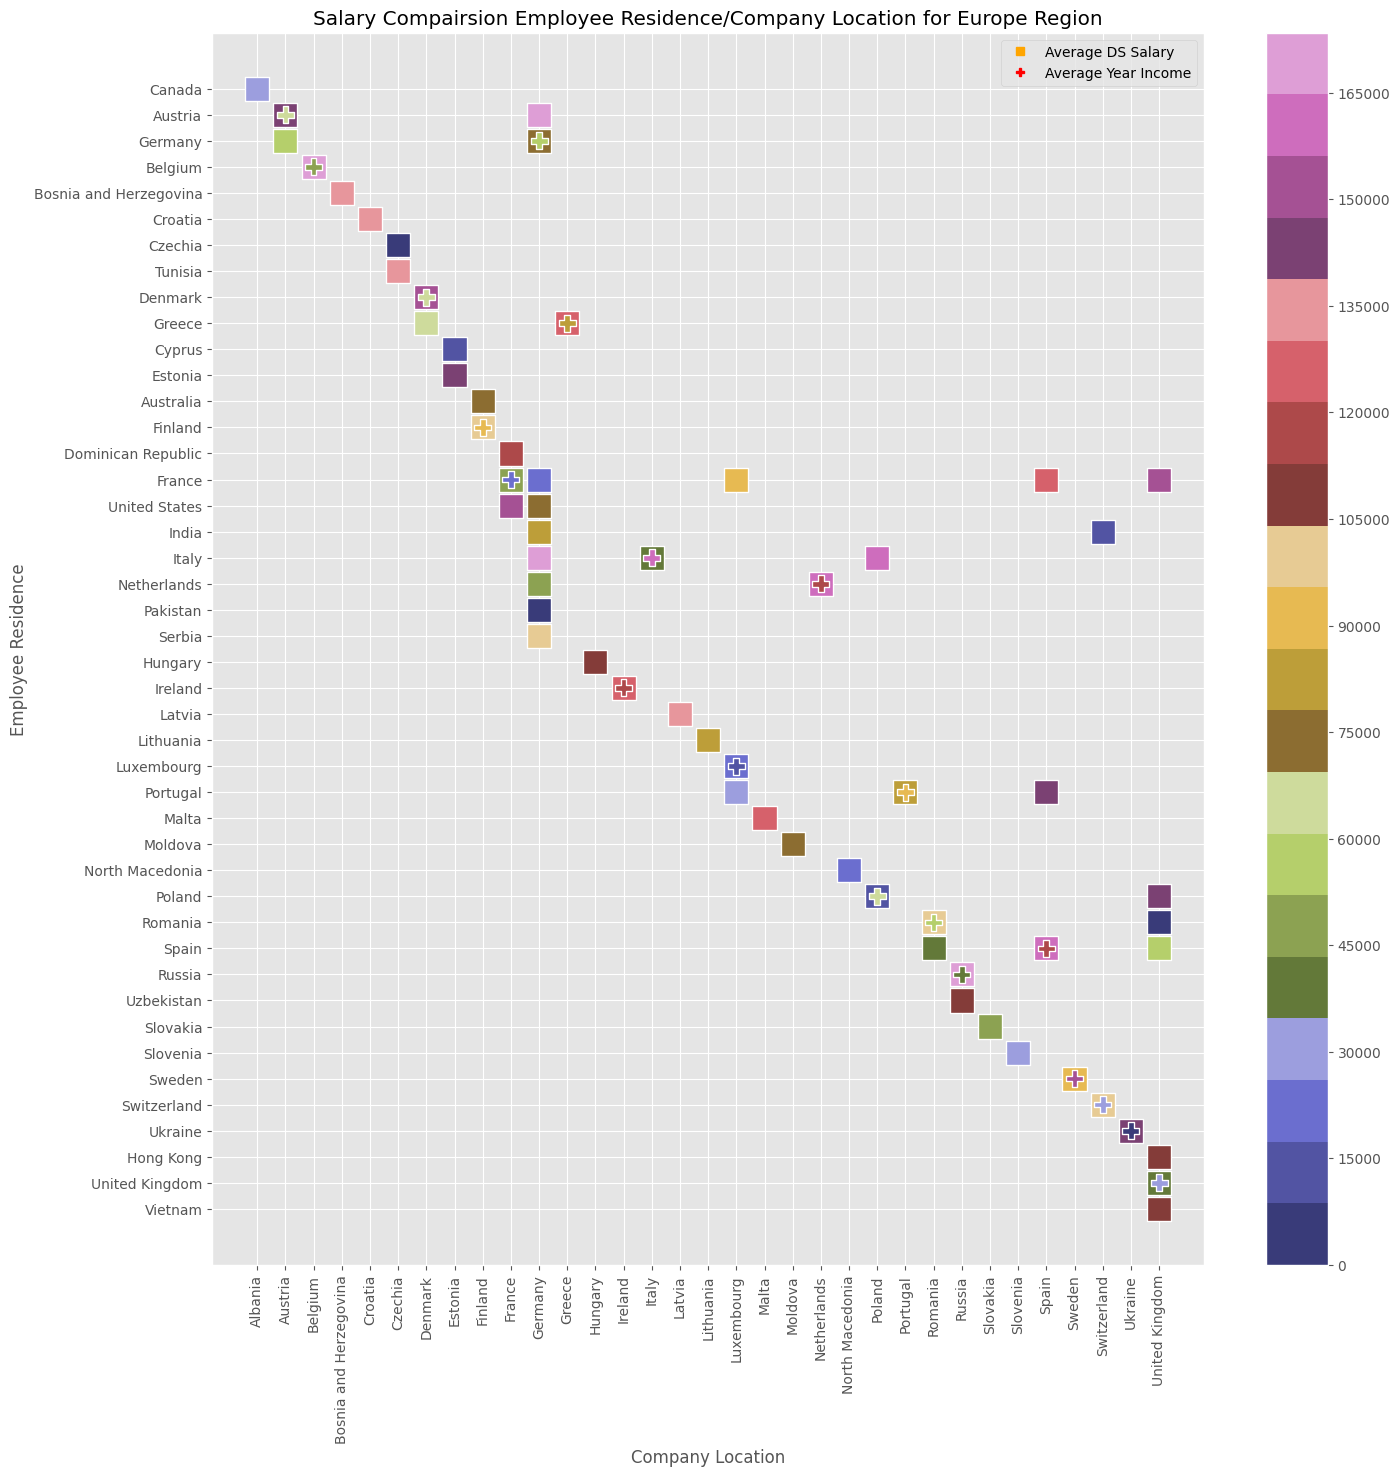

In [80]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(
    data = avg_europe_sal_ds,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, avg_europe_sal_ds.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, avg_europe_sal_ds.average_salary.max(), 15000))
ax.tick_params(axis='x', labelrotation = 90)
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Europe Region"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



And here we can see that there are very low average salaries in Spain. So it makes sense that although DS salaries in much higher, it still lower than in countries where average salaries are higher.

The next 3 plots are the same as above but split by experience level, so we can see some details about juniors and seniors.

In [81]:
en_eu_df = europe_df[europe_df["experience_level"]=="Entry level"]
en_avg_europe_sal = pd.DataFrame(en_eu_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
en_avg_europe_sal.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
en_avg_europe_sal["ds"]=True
en_avg_europe_sal = pd.concat([en_avg_europe_sal, avg_sal_europe])
en_avg_europe_sal.sample(5)


,company_country_name,employee_residence_country_name,average_salary,ds
29,Spain,Spain,29690.0,False
23,Switzerland,India,6477.0,True
15,Luxembourg,Luxembourg,65085.0,True
0,Austria,Austria,53200.0,True
33,Poland,Poland,16850.0,False


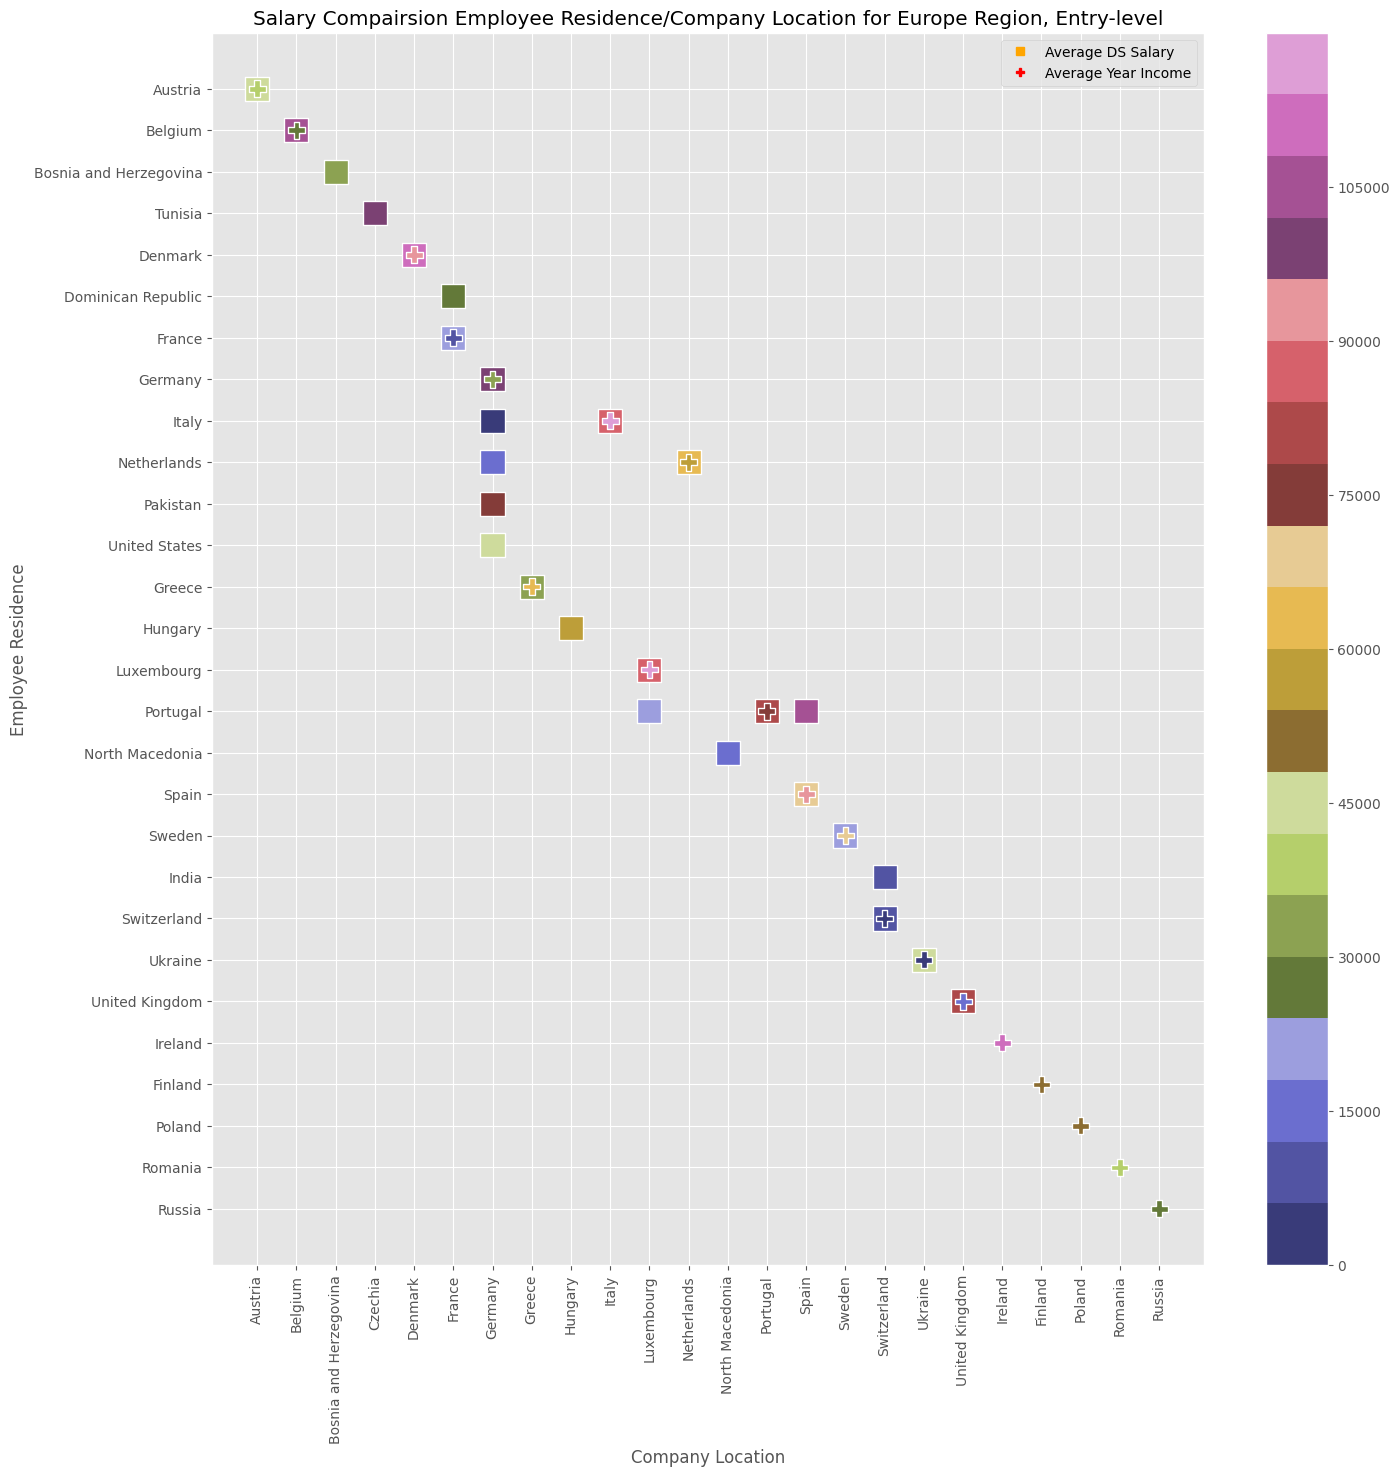

In [82]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(
    data = en_avg_europe_sal,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, en_avg_europe_sal.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, en_avg_europe_sal.average_salary.max(), 15000))
ax.tick_params(axis='x', labelrotation = 90)
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Europe Region, Entry-level"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



In [83]:
mi_eu_df = europe_df[europe_df["experience_level"]=="Mid/Intermediate level"]
mi_avg_europe_sal = pd.DataFrame(mi_eu_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
mi_avg_europe_sal.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
mi_avg_europe_sal["ds"]=True
mi_avg_europe_sal = pd.concat([mi_avg_europe_sal, avg_sal_europe])
mi_avg_europe_sal.sample(5)


,company_country_name,employee_residence_country_name,average_salary,ds
15,Austria,Austria,52760.0,False
34,Romania,Romania,14160.0,False
26,Italy,Italy,35990.0,False
37,Russia,Russia,11610.0,False
6,Finland,Finland,75020.0,True


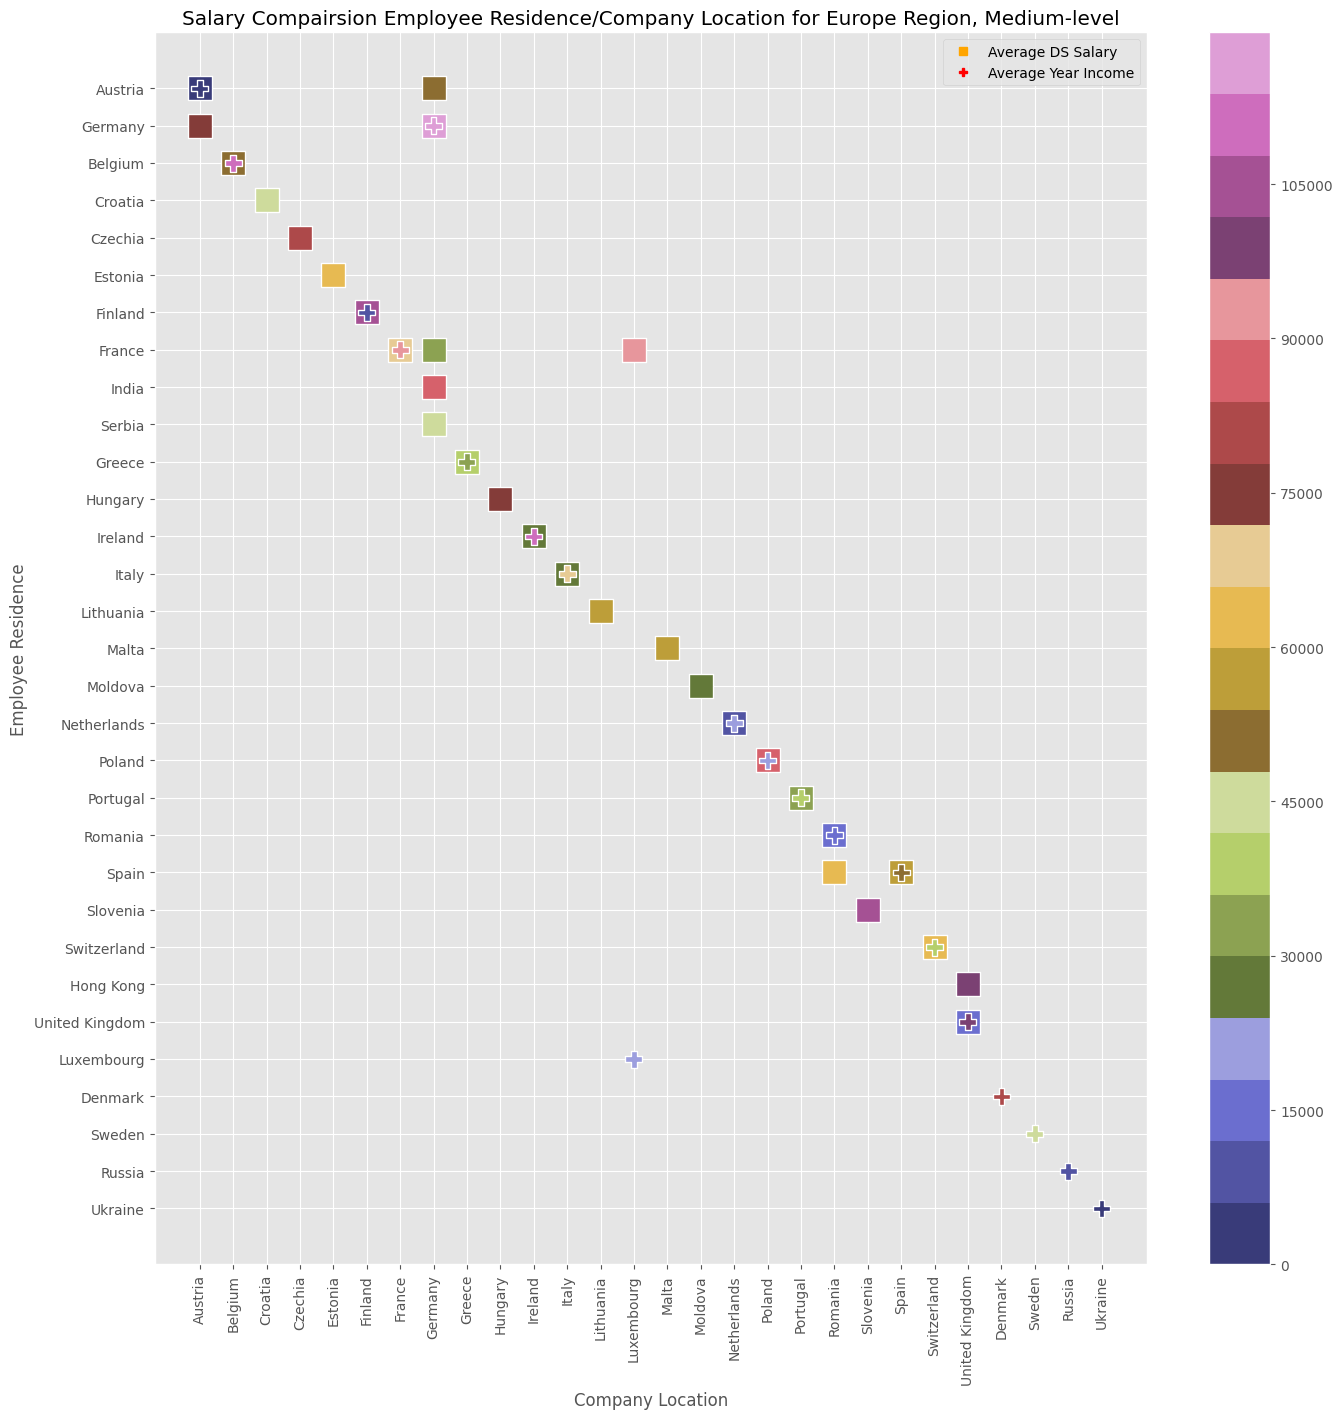

In [84]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(
    data = mi_avg_europe_sal,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, mi_avg_europe_sal.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, mi_avg_europe_sal.average_salary.max(), 15000))
ax.tick_params(axis='x', labelrotation = 90)
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Europe Region, Medium-level"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



In [85]:
se_ex_eu_df = europe_df[europe_df["experience_level"].isin(["Senior", "Executive level"])]
se_avg_europe_sal = pd.DataFrame(se_ex_eu_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
se_avg_europe_sal.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
se_avg_europe_sal["ds"]=True
se_avg_europe_sal = pd.concat([se_avg_europe_sal, avg_sal_europe])
se_avg_europe_sal.sample(5)


,company_country_name,employee_residence_country_name,average_salary,ds
11,Greece,Greece,53761.0,True
48,Ukraine,Ukraine,4120.0,False
17,Belgium,Belgium,50490.0,False
15,Netherlands,Netherlands,98666.0,True
19,Russia,Uzbekistan,112784.0,True


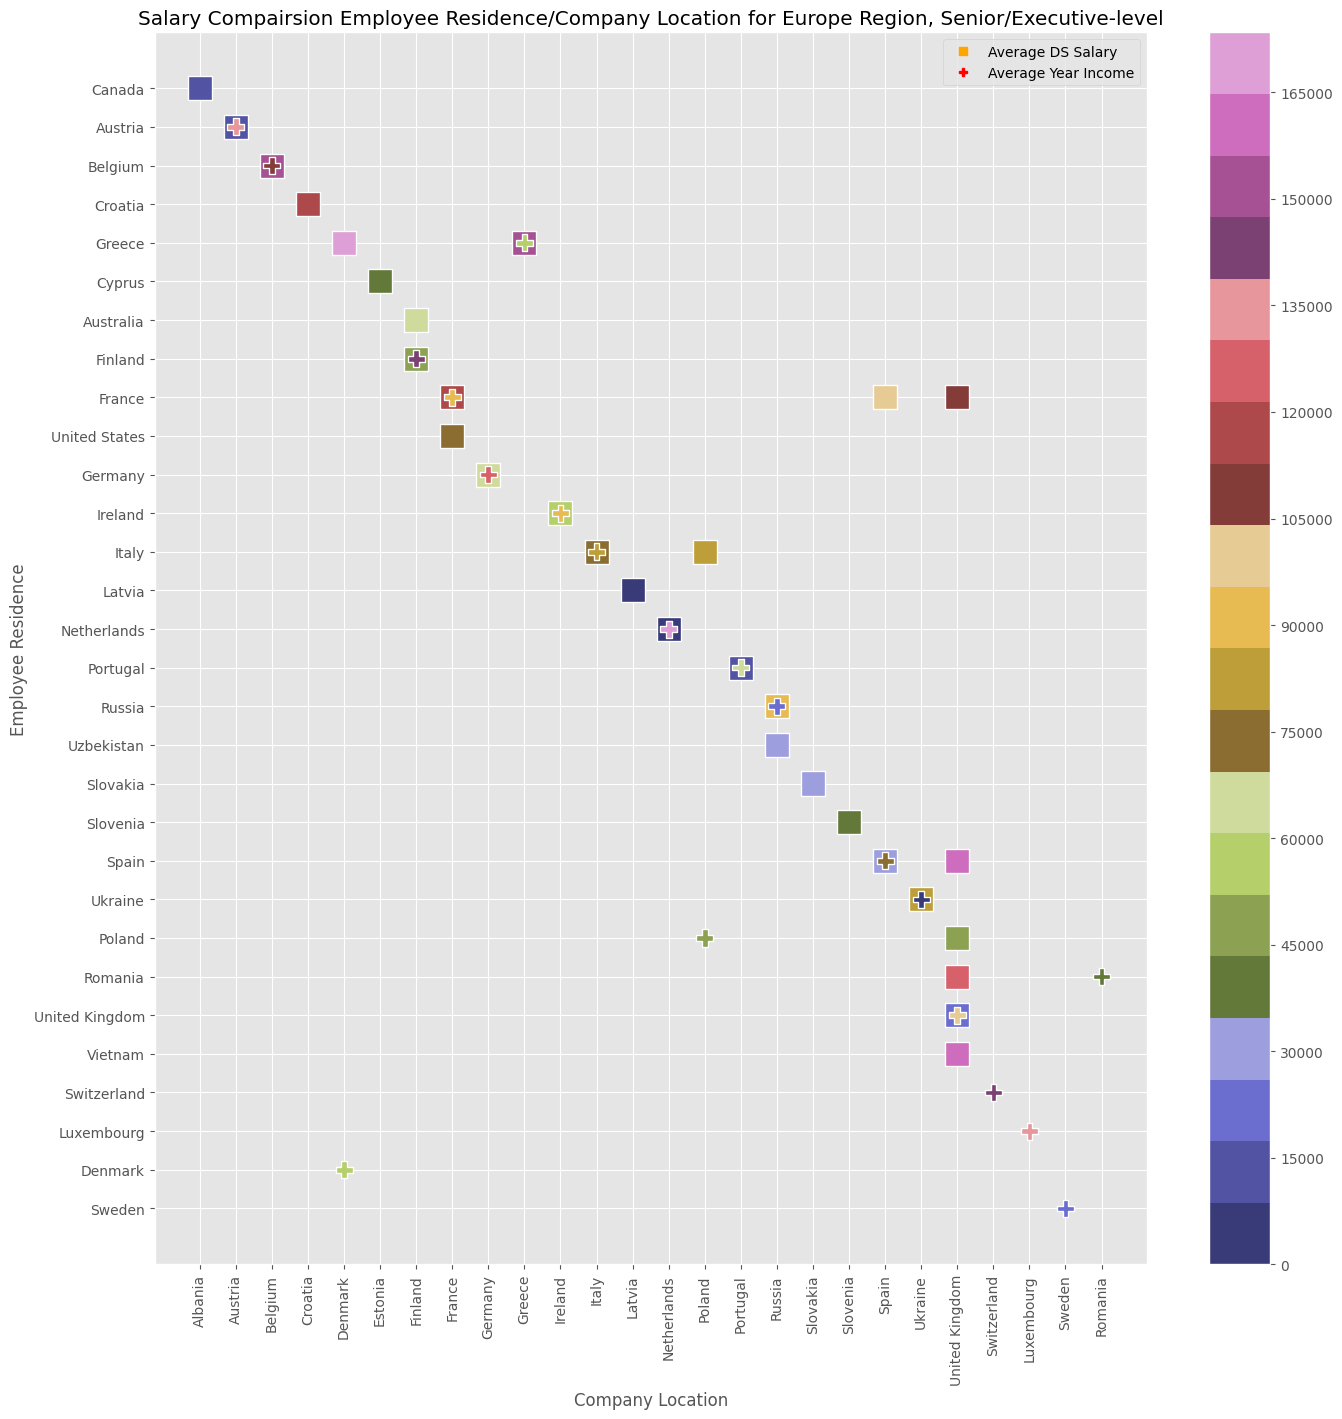

In [86]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(
    data = se_avg_europe_sal,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, se_avg_europe_sal.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, se_avg_europe_sal.average_salary.max(), 15000))
ax.tick_params(axis='x', labelrotation = 90)
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Europe Region, Senior/Executive-level"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



Cool! Now we can tell that Germany provides opportunities for entry-level specialists to work from other countries! Speaking of Mid-level Specialists, Germany is also leading in that criteria but pays them less than they pay the Germans. 

And if we take a look at the Highest and most Experienced Specialists we can definitely tell that  UK companies provide more opportunities to work from other countries for them. But salaries are diverse and we can't tell for sure if they pay more or less to abroad specialists. 

We need much more data to made some valuable conclusions and find out dependencies.

#### 3.7.3 Asia

In [87]:
asia_df = df[df["company_location_region"]=="Asia"]

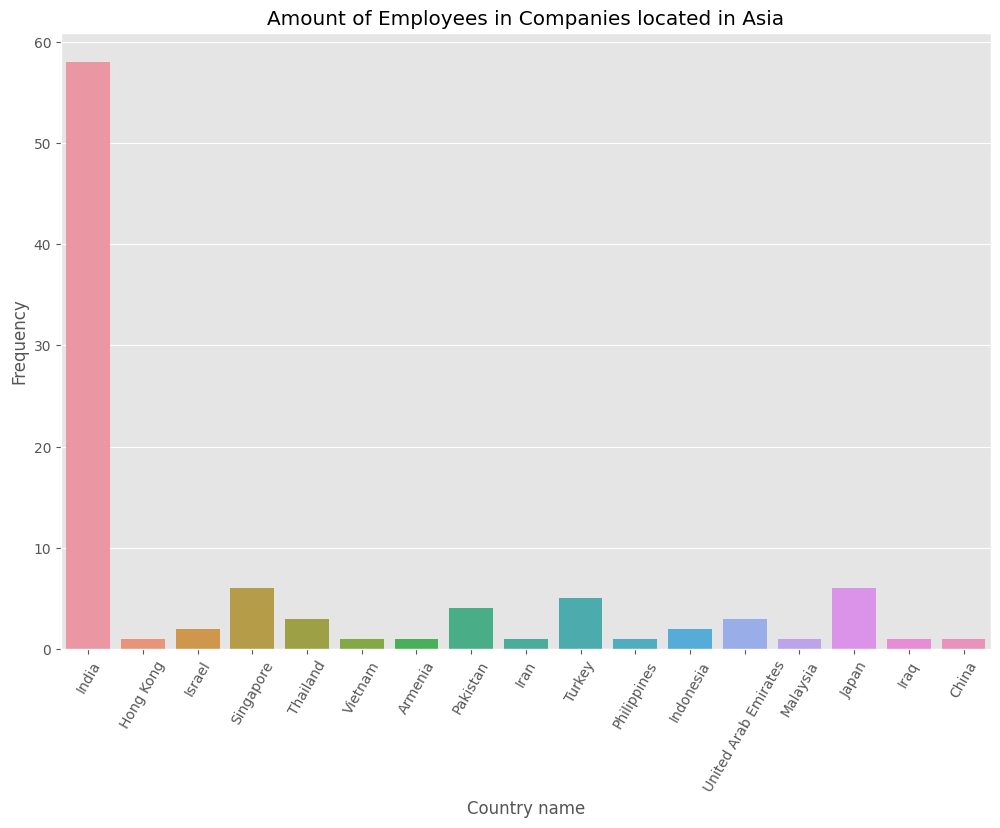

In [88]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data = asia_df, x = "company_location_country_name")
ax.set(xlabel="Country name", ylabel="Frequency", title="Amount of Employees in Companies located in Asia")
ax.tick_params(axis='x', labelrotation = 60)
plt.show()

In [89]:
top5_countries_in_asia =asia_df.company_location_country_name.value_counts().head(5)
top5_countries_in_asia

company_location_country_name
India        58
Singapore     6
Japan         6
Turkey        5
Pakistan      4
Name: count, dtype: int64

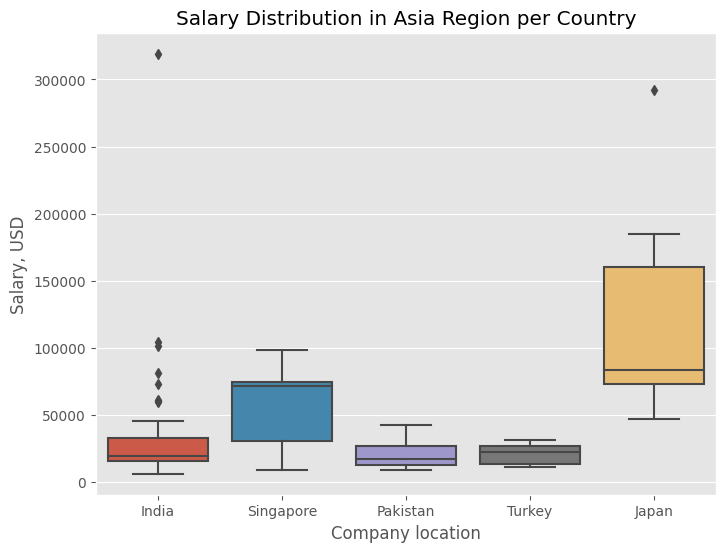

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=asia_df[ asia_df["company_location_country_name"].isin(top5_countries_in_asia.index.tolist())], x = "company_location_country_name", y = "adjusted_salary_usd")

ax.set(xlabel="Company location", ylabel="Salary, USD", title="Salary Distribution in Asia Region per Country")
plt.show()

In [91]:
avg_asia_sal_ds = pd.DataFrame(asia_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
avg_asia_sal_ds.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
avg_asia_sal_ds["ds"]=True
avg_sal_asia = df_2023_avg_income[df_2023_avg_income["country_name"].isin(asia_df["company_location_country_name"].unique())]
avg_sal_asia.drop(columns=["Rank", "month_income_usd"], inplace=True)
avg_sal_asia.rename(columns={"country_name":"company_country_name","year_income_usd":"average_salary"}, inplace=True)
avg_sal_asia["employee_residence_country_name"] = avg_sal_asia.company_country_name
avg_sal_asia["ds"]=False
avg_asia_sal_ds = pd.concat([avg_asia_sal_ds, avg_sal_asia])
avg_asia_sal_ds.sample(5)

,company_country_name,employee_residence_country_name,average_salary,ds
7,Indonesia,Indonesia,15960.0,True
51,Vietnam,Vietnam,3590.0,False
52,Philippines,Philippines,3550.0,False
9,Iraq,Iraq,110124.0,True
21,United Arab Emirates,United Arab Emirates,108638.0,True


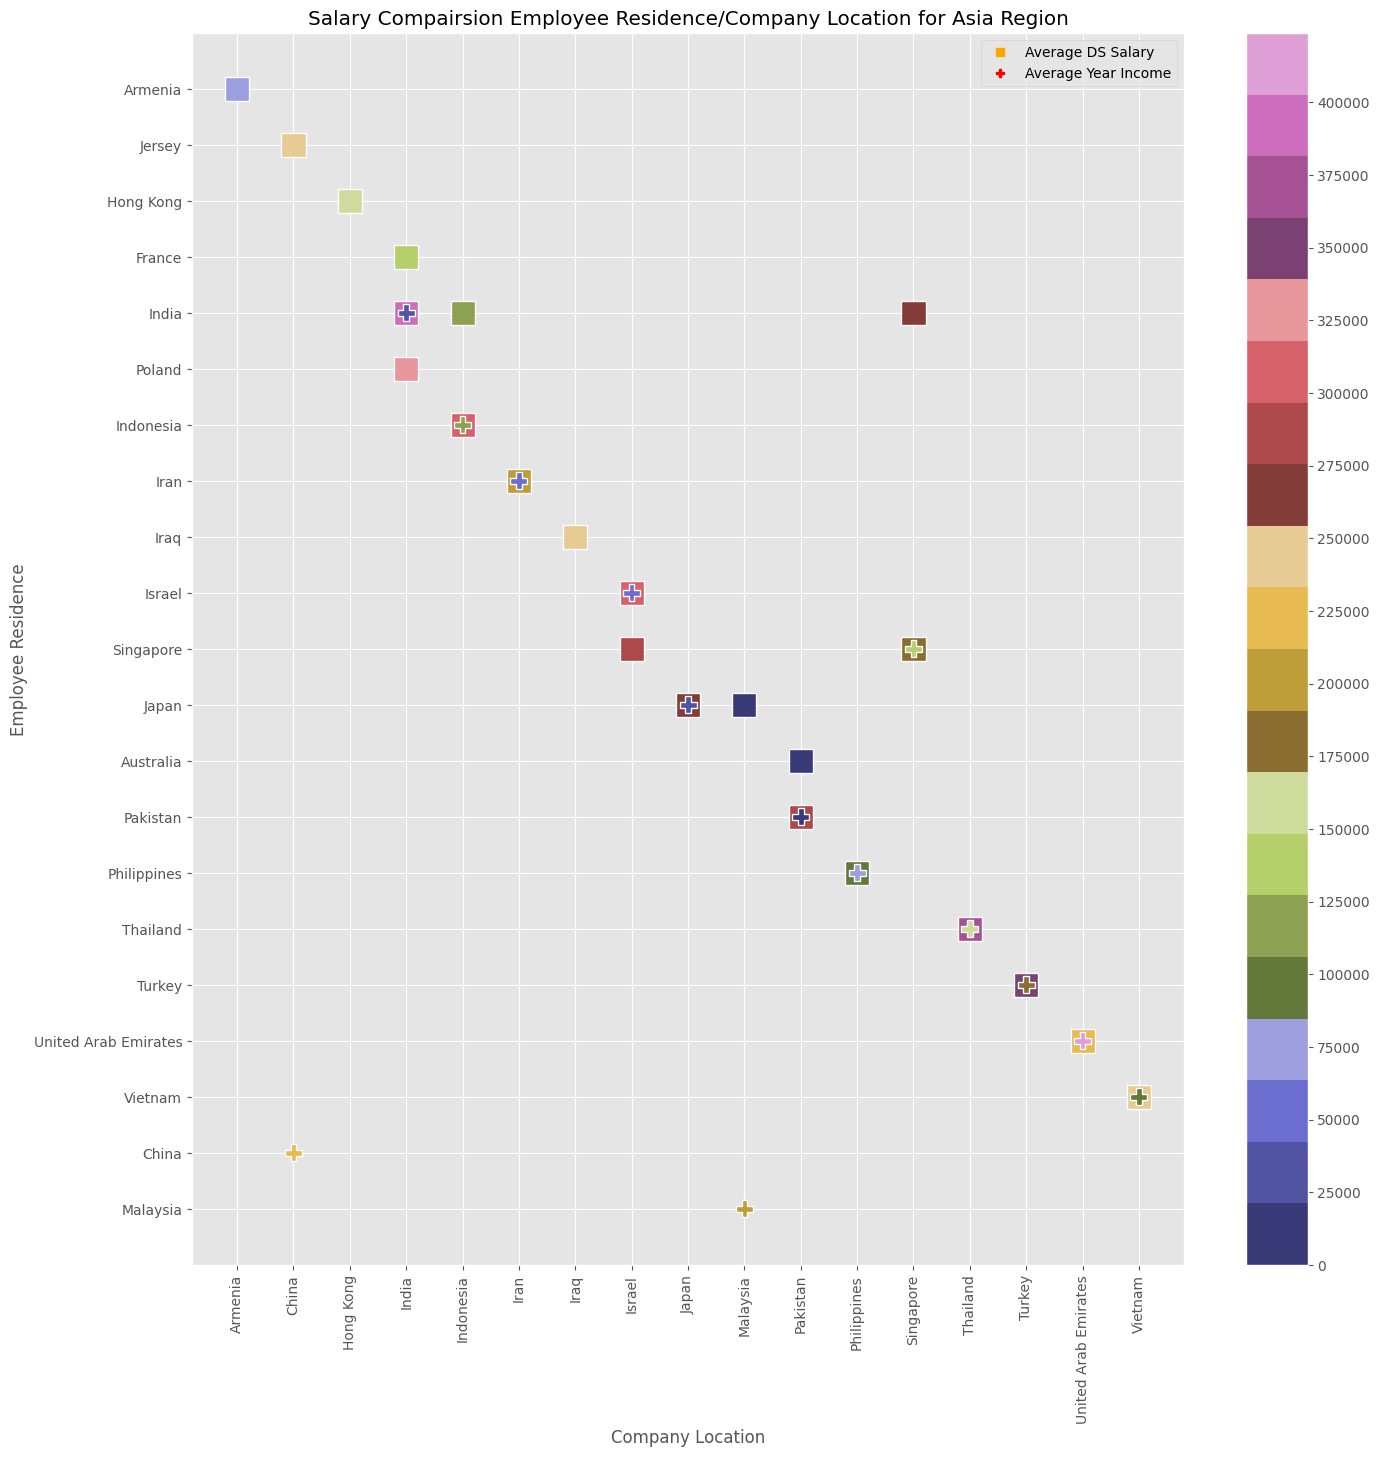

In [92]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(
    data = avg_asia_sal_ds,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, avg_asia_sal_ds.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, avg_asia_sal_ds.average_salary.max(), 25000))
ax.tick_params(axis='x', labelrotation = 90)
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Asia Region"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



#### 3.7.4 Africa


In [93]:
africa_df = df[df["company_location_region"]=="Africa"]


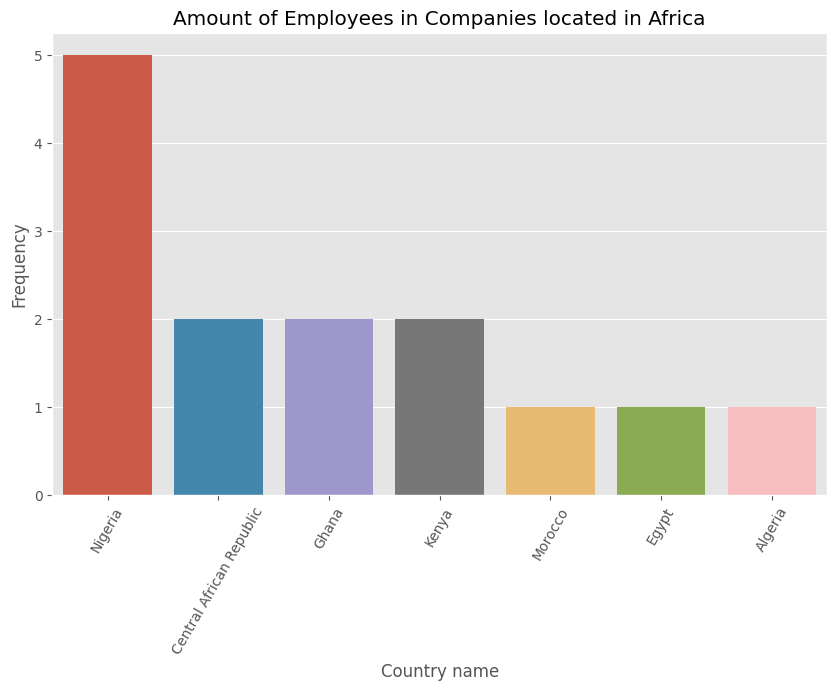

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = africa_df, x = "company_location_country_name")
ax.set(xlabel="Country name", ylabel="Frequency", title="Amount of Employees in Companies located in Africa")
ax.tick_params(axis='x', labelrotation = 60)
plt.show()

Not a lot data :(

In [95]:
avg_africa_sal_ds = pd.DataFrame(africa_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
avg_africa_sal_ds.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
avg_africa_sal_ds["ds"]=True
avg_sal_africa = df_2023_avg_income[df_2023_avg_income["country_name"].isin(africa_df["company_location_country_name"].unique())]
avg_sal_africa.drop(columns=["Rank", "month_income_usd"], inplace=True)
avg_sal_africa.rename(columns={"country_name":"company_country_name","year_income_usd":"average_salary"}, inplace=True)
avg_sal_africa["employee_residence_country_name"] = avg_sal_africa.company_country_name
avg_sal_africa["ds"]=False
avg_africa_sal_ds = pd.concat([avg_africa_sal_ds, avg_sal_africa])
avg_africa_sal_ds.sample(5)

,company_country_name,employee_residence_country_name,average_salary,ds
4,Kenya,Kenya,45106.0,True
1,Central African Republic,Central African Republic,48609.0,True
6,Nigeria,Nigeria,81817.0,True
3,Ghana,Ghana,20018.0,True
5,Morocco,Morocco,10640.0,True


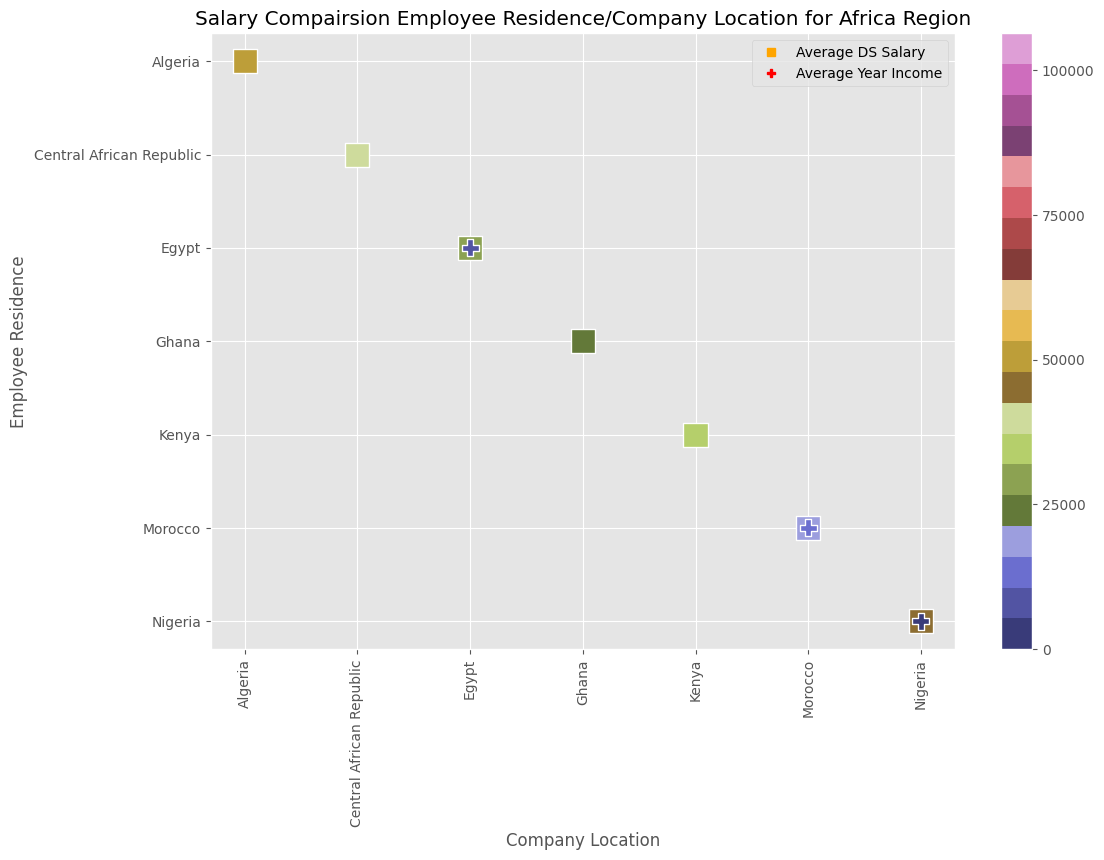

In [96]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    data = avg_africa_sal_ds,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, avg_africa_sal_ds.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, avg_africa_sal_ds.average_salary.max(), 25000))
ax.tick_params(axis='x', labelrotation = 90)
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Africa Region"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



#### 3.7.5 Oceania


In [97]:
oceania_df = df[df["company_location_region"]=="Oceania"]

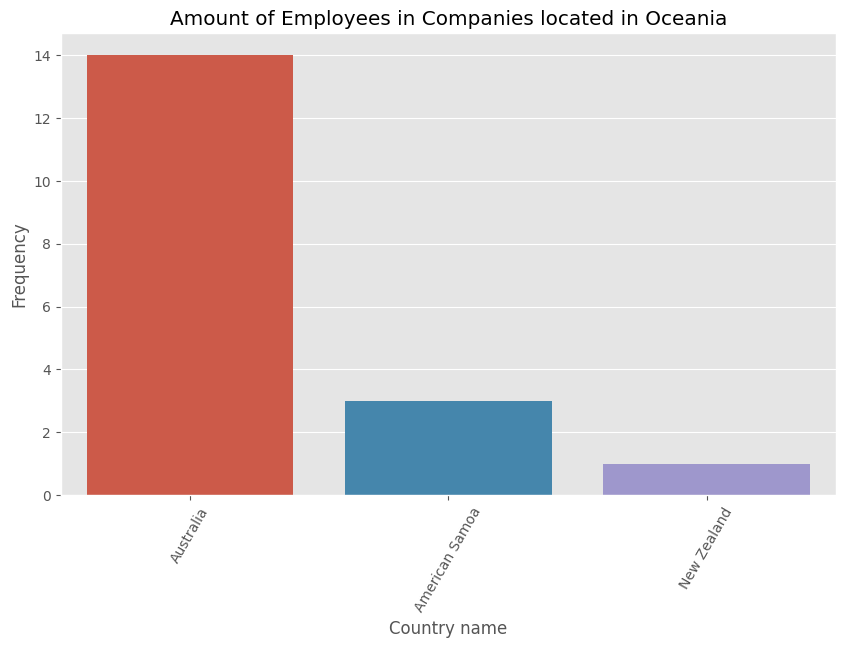

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = oceania_df, x = "company_location_country_name")
ax.set(xlabel="Country name", ylabel="Frequency", title="Amount of Employees in Companies located in Oceania")
ax.tick_params(axis='x', labelrotation = 60)
plt.show()

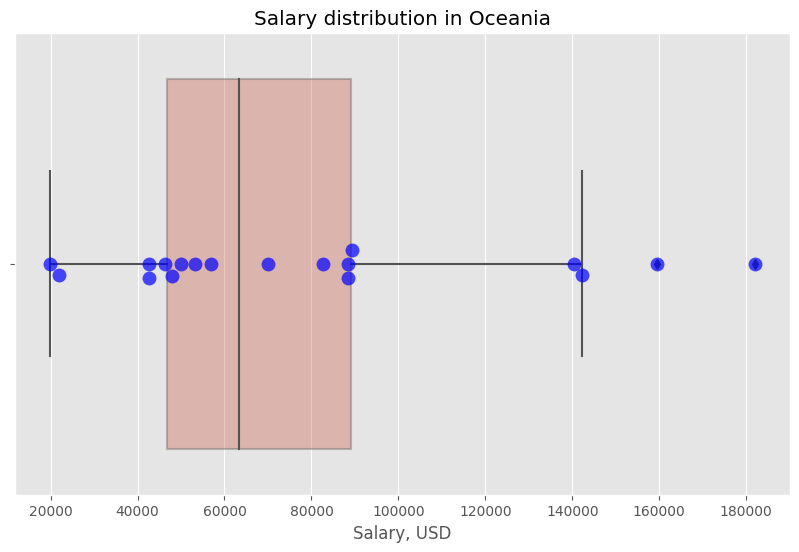

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = oceania_df["adjusted_salary_usd"], boxprops=dict(alpha=0.35))
sns.swarmplot(x = oceania_df["adjusted_salary_usd"], alpha = 0.7, size=10, color="blue")
ax.set(
    xlabel="Salary, USD",
    title="Salary distribution in Oceania"
    )
plt.show()

In [100]:
avg_oceania_sal_ds = pd.DataFrame(oceania_df.groupby(by=["company_location_country_name", "employee_residence_country_name"])["adjusted_salary_usd"].mean().apply(np.round)).reset_index()
avg_oceania_sal_ds.rename(columns={"adjusted_salary_usd":"average_salary", "company_location_country_name":"company_country_name", "employee_country_name":"employee_country_name"}, inplace=True)
avg_oceania_sal_ds["ds"]=True
avg_sal_oceania = df_2023_avg_income[df_2023_avg_income["country_name"].isin(oceania_df["company_location_country_name"].unique())]
avg_sal_oceania.drop(columns=["Rank", "month_income_usd"], inplace=True)
avg_sal_oceania.rename(columns={"country_name":"company_country_name","year_income_usd":"average_salary"}, inplace=True)
avg_sal_oceania["employee_residence_country_name"] = avg_sal_oceania.company_country_name
avg_sal_oceania["ds"]=False
avg_oceania_sal_ds = pd.concat([avg_oceania_sal_ds, avg_sal_oceania])
avg_oceania_sal_ds.sample(5)

,company_country_name,employee_residence_country_name,average_salary,ds
11,Australia,Australia,57170.0,False
6,Australia,United States,181944.0,True
1,American Samoa,India,36540.0,True
4,Australia,Nigeria,50000.0,True
3,Australia,India,70000.0,True


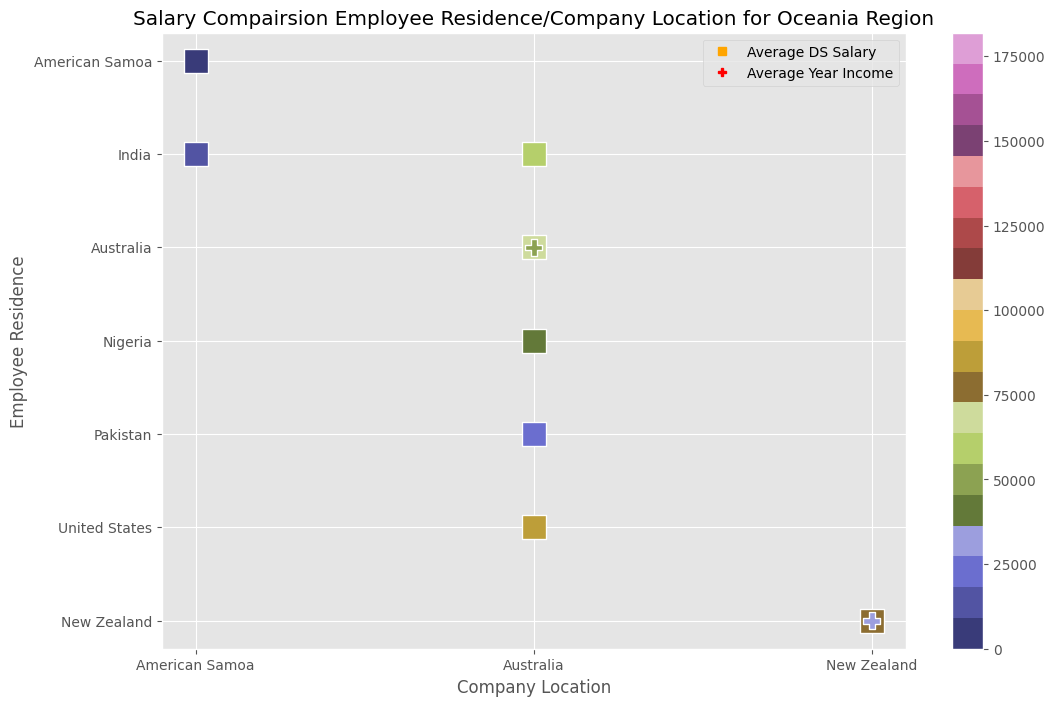

In [101]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    data = avg_oceania_sal_ds,
    x = "company_country_name",
    y="employee_residence_country_name",
    hue="average_salary",
    size="ds",
    style="ds",
    palette="tab20b",
    sizes=(300, 150),
    s=300,
    markers=["P","s"]
    )

norm = plt.Normalize(0, avg_oceania_sal_ds.average_salary.max())
sm = plt.cm.ScalarMappable(cmap="tab20b", norm=norm)      
sm.set_array([])

cbar = ax.figure.colorbar(sm)
cbar.set_ticks(np.arange(0, avg_oceania_sal_ds.average_salary.max(), 25000))
ax.set(
    xlabel="Company Location",
    ylabel = "Employee Residence",
    title="Salary Compairsion Employee Residence/Company Location for Oceania Region"
    )
markers = [plt.Line2D([0,0],[0,0],marker='s',color='orange',linestyle=''),
           plt.Line2D([0,0],[0,0],marker='P',color='red',linestyle='')]
labels = ["Average DS Salary", "Average Year Income"]
plt.legend(markers,labels)



As expected Australia is the heart of Oceania IT. Unfortunately, there is not a lot of data, and it's really hard to do something more specific. But there is one interesting moment here. Only US employees get paid the most.

### 3.8 Slope charts


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Amount of data'),
 Text(0.5, 1.0, 'Amount of data per year')]

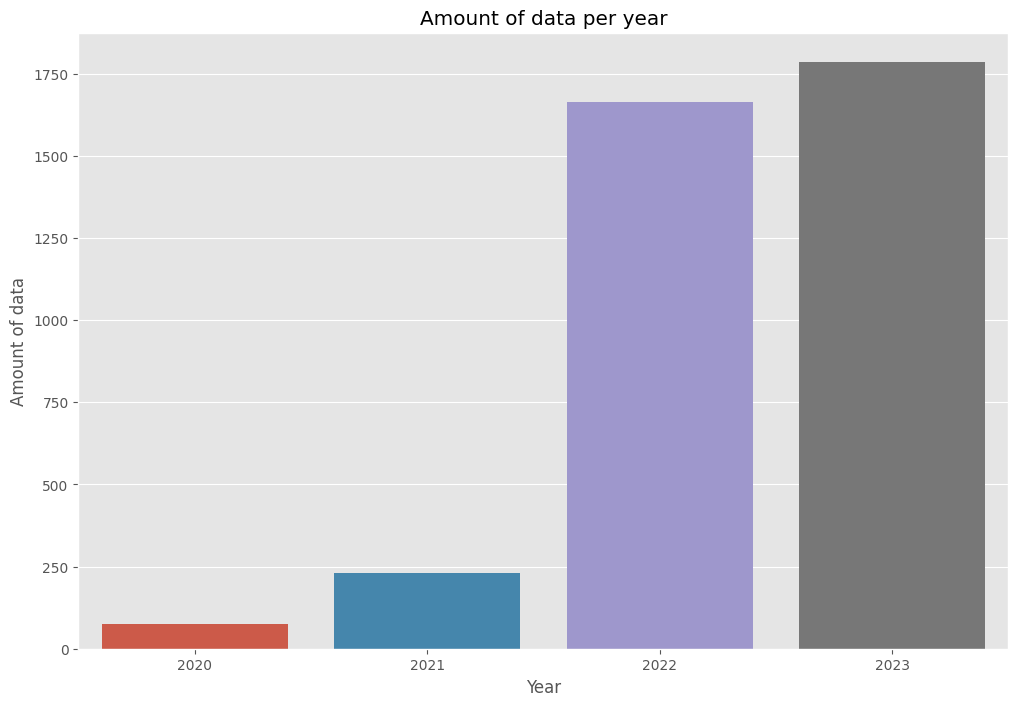

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, x = "work_year")
ax.set(xlabel="Year", ylabel="Amount of data", title="Amount of data per year")

When I first saw this dataset I thought it will be cool to see how the remote ratio will grow up after covid, and how many more entry-level employees started to appear because of the new AI niche but, there is not a lot of data in 2020 and 2021 years. So I will use 2022 and 2023 to find out if it meets my expectation

In [103]:
d_2022_data = df[df["work_year"]==2022]
d_2023_data = df[df["work_year"]==2023]

#### 3.8.1 Experience level

In [104]:
# count experience level fractions in 2022 and 2023
d_2022_fraction = (d_2022_data[["work_year", "experience_level"]].groupby(by=["experience_level"]).count()*100/d_2022_data.shape[0]).T.reset_index()
d_2023_fraction = (d_2023_data[["work_year", "experience_level"]].groupby(by=["experience_level"]).count()*100/d_2023_data.shape[0]).T.reset_index()

Text(0.5, 1.0, 'Experience level slope chart')

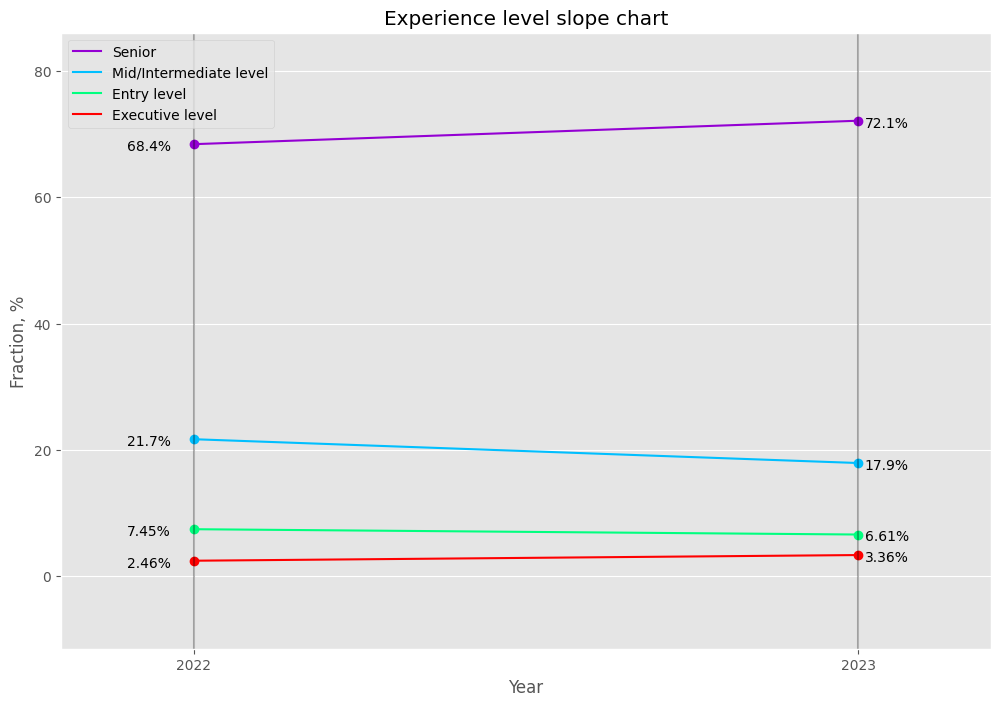

In [105]:
plt.figure(figsize=(12, 8))
color_l = ["darkviolet", "deepskyblue", "springgreen" , "red"]
for color_n, exp_lvl in zip(color_l,df.experience_level.unique().tolist()):
    plt.plot([2022, 2023], [d_2022_fraction[exp_lvl].iloc[0], d_2023_fraction[exp_lvl].iloc[0]], color=color_n, label = exp_lvl )
    plt.plot([2022], [d_2022_fraction[exp_lvl].iloc[0]], marker = "o",color=color_n)
    plt.plot([2023], [d_2023_fraction[exp_lvl].iloc[0]], marker = "o",color=color_n)
    plt.text(2022-0.1, d_2022_fraction[exp_lvl].iloc[0]-1, f"{d_2022_fraction[exp_lvl].iloc[0]:.3}%")
    plt.text(2023+0.01, d_2023_fraction[exp_lvl].iloc[0]-1, f"{d_2023_fraction[exp_lvl].iloc[0]:.3}%")
plt.xticks([2022, 2023])
plt.legend(loc="upper left")
plt.axvline(x=2022 ,color="black", alpha = 0.3)
plt.axvline(x=2023, color = "black", alpha = 0.3)
plt.xlabel("Year")
plt.ylabel("Fraction, %")
plt.margins(0.2, 0.2)
plt.title("Experience level slope chart")


Unfortunately, Juniors are not as needed as it was before. I guess it is because of AI technology development.

Also, we can tell that Seniors are in demand as ever. 


#### 3.8.2 Job category

In [106]:
d_2022_job_category_frac = (d_2022_data[["job_category", "adjusted_salary_usd"]].groupby(by=["job_category"]).count()*100/d_2022_data.shape[0]).T.reset_index()
d_2023_job_category_frac = (d_2023_data[["job_category", "adjusted_salary_usd"]].groupby(by=["job_category"]).count()*100/d_2023_data.shape[0]).T.reset_index()
d_2022_job_category_frac


job_category,index,Artificial Intelligence,Business Intelligence,Data Analysis,Data Architecture,Data Engineering,Data Science,Machine Learning,Managment,Other
0,adjusted_salary_usd,0.721154,0.961538,18.028846,2.824519,34.495192,30.288462,10.396635,1.442308,0.841346


Text(0.5, 1.0, 'Experience level slope chart')

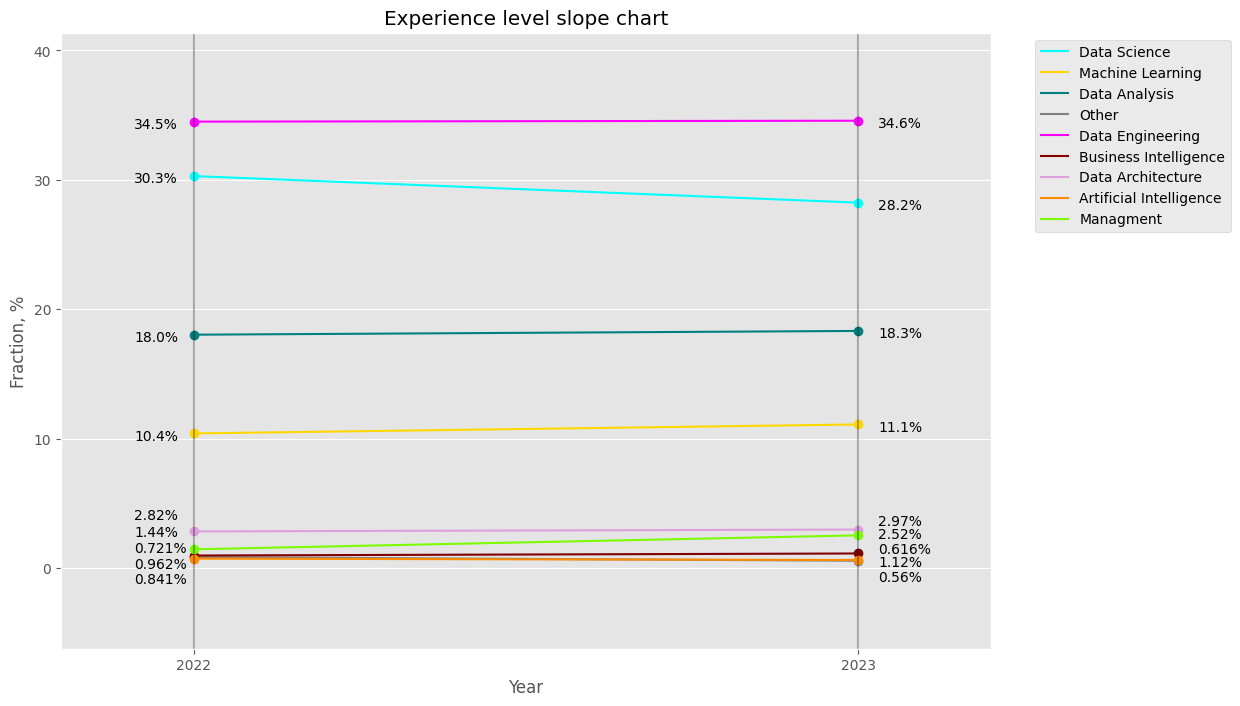

In [107]:
plt.figure(figsize=(12, 8))
color_l = ["aqua", "gold", "teal", "grey", "magenta", "maroon", "plum", "darkorange", "lawngreen"]

y_shifts_l = [-0.5, -0.5, -0.5, -2, -0.5, -1, 0.9, 0.5, 1]
y_shifts_r = [-0.5, -0.5, -0.5, -1.6, -0.5, -1, 0.3, 0.5, -0.2]
for idx, job_cat in enumerate(df.job_category.unique().tolist()):
    tmp_y = [
        0.0 if job_cat not in d_2022_job_category_frac.columns else d_2022_job_category_frac[job_cat].iloc[0],
        0.0 if job_cat not in d_2023_job_category_frac.columns else d_2023_job_category_frac[job_cat].iloc[0],
        ]
    plt.plot([2022, 2023], tmp_y, color=color_l[idx], label = job_cat )
    plt.plot([2022], [tmp_y[0]], marker = "o",color=color_l[idx])
    plt.plot([2023], [tmp_y[1]], marker = "o",color=color_l[idx])
    plt.text(2022-0.09, tmp_y[0]+y_shifts_l[idx], f"{tmp_y[0]:.3}%")
    plt.text(2023+0.03, tmp_y[1]+y_shifts_r[idx], f"{tmp_y[1]:.3}%")
plt.xticks([2022, 2023])
plt.legend(loc="best", bbox_to_anchor=(1.04, 1))
plt.axvline(x=2022 ,color="black", alpha = 0.3)
plt.axvline(x=2023, color = "black", alpha = 0.3)
plt.xlabel("Year")
plt.ylabel("Fraction, %")
plt.margins(0.2, 0.2)
plt.title("Experience level slope chart")


Despite the AI boom on the internet, there are not a lot of employees as we can see. Strangely since last year not a lot of things change in a category meaning of course.

#### 3.8.3 Remote Ratio

In [108]:
d_2022_rr_fraction = (d_2022_data[["work_year", "remote_ratio"]].groupby(by=["remote_ratio"]).count()*100/d_2022_data.shape[0]).T.reset_index()
d_2023_rr_fraction = (d_2023_data[["work_year", "remote_ratio"]].groupby(by=["remote_ratio"]).count()*100/d_2023_data.shape[0]).T.reset_index()

Text(0.5, 1.0, 'Remote Ratio slope chart')

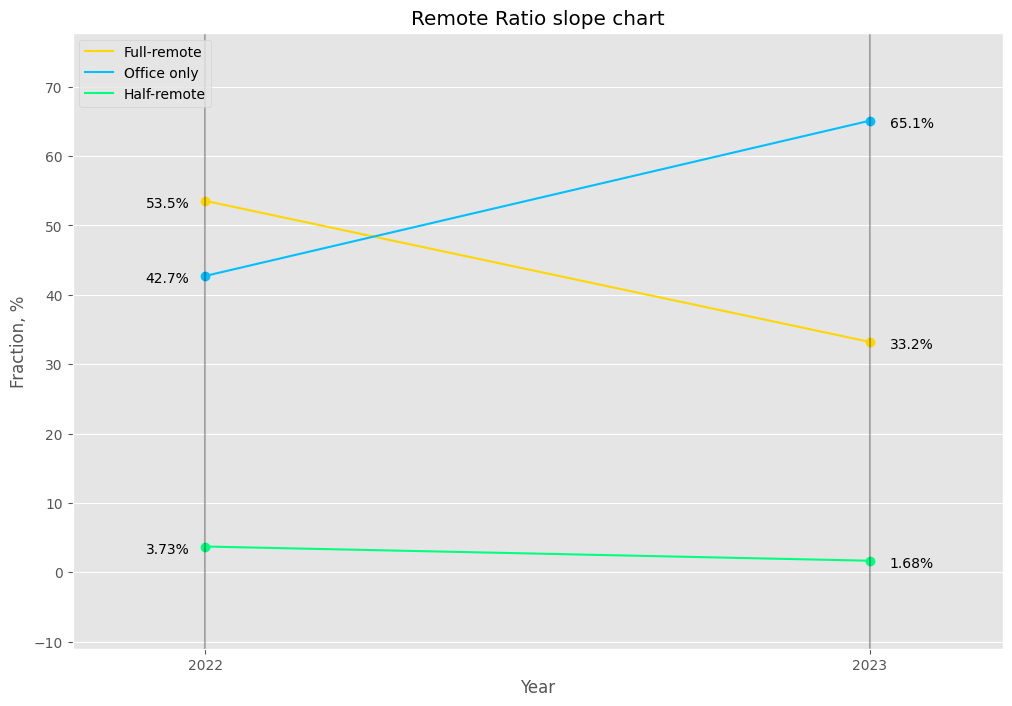

In [109]:
plt.figure(figsize=(12, 8))
color_l = ["gold", "deepskyblue", "springgreen"]
for color_n, remote_r in zip(color_l,df.remote_ratio.unique().tolist()):
    plt.plot([2022, 2023], [d_2022_rr_fraction[remote_r].iloc[0], d_2023_rr_fraction[remote_r].iloc[0]], color=color_n, label = remote_r )
    plt.plot([2022], [d_2022_rr_fraction[remote_r].iloc[0]], marker = "o",color=color_n)
    plt.plot([2023], [d_2023_rr_fraction[remote_r].iloc[0]], marker = "o",color=color_n)
    plt.text(2022-0.09, d_2022_rr_fraction[remote_r].iloc[0]-1, f"{d_2022_rr_fraction[remote_r].iloc[0]:.3}%")
    plt.text(2023+0.03, d_2023_rr_fraction[remote_r].iloc[0]-1, f"{d_2023_rr_fraction[remote_r].iloc[0]:.3}%")
plt.xticks([2022, 2023])
plt.legend(loc="upper left")
plt.axvline(x=2022 ,color="black", alpha = 0.3)
plt.axvline(x=2023, color = "black", alpha = 0.3)
plt.xlabel("Year")
plt.ylabel("Fraction, %")
plt.margins(0.2, 0.2)
plt.title("Remote Ratio slope chart")


That is unexpected result at all. But I suppose it happened because most of in the most countries COVID restrictions become less strict, and many companies return to on-cite "style" of working.

### 3.9 Geografical data
